# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Data Acquisition

In [2]:
hp = pd.read_csv("housedata.csv")
print(len(hp))
print(hp.dtypes)

4619
date              object
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors            object
waterfront       float64
view             float64
condition        float64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
cityzip           object
state             object
country           object
price            float64
dtype: object


In [3]:
hp.shape

(4619, 18)

In [4]:
hp.describe()

bedrooms    bathrooms   sqft_living      sqft_lot   waterfront  \
count  4614.000000  4612.000000   4619.000000  4.619000e+03  4611.000000   
mean      3.401604     2.159584   2138.381901  1.484054e+04     0.007157   
std       0.909381     0.783670    962.448785  3.582105e+04     0.084304   
min       0.000000     0.000000    370.000000  6.380000e+02     0.000000   
25%       3.000000     1.750000   1460.000000  5.000000e+03     0.000000   
50%       3.000000     2.250000   1970.000000  7.683000e+03     0.000000   
75%       4.000000     2.500000   2620.000000  1.100250e+04     0.000000   
max       9.000000     8.000000  13540.000000  1.074218e+06     1.000000   

             view    condition   sqft_above  sqft_basement     yr_built  \
count  4610.00000  4610.000000  4619.000000    4619.000000  4619.000000   
mean      0.24013     3.451844  1826.347911     312.033990  1970.770297   
std       0.77764     0.677220   861.580847     463.820093    29.734546   
min       0.00000     1.000000   370.000000       0.000000  1900.000000   
25%       0.00000     3.000000  1190.000000       0.000000  1951.000000   
50%       0.00000     3.000000  1590.000000       0.000000  1976.000000   
75%       0.00000     4.000000  2300.000000     610.000000  1997.000000   
max       4.00000     5.000000  9410.000000    4820.000000  2014.000000   

       yr_renovated         price  
count   4619.000000  4.619000e+03  
mean     809.602511  5.517451e+05  
std      979.607543  5.629078e+05  
min        0.000000  0.000000e+00  
25%        0.000000  3.225000e+05  
50%        0.000000  4.608869e+05  
75%     1999.000000  6.544750e+05  
max     2014.000000  2.659000e+07

In [5]:
hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4619 entries, 0 to 4618
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4619 non-null   object 
 1   bedrooms       4614 non-null   float64
 2   bathrooms      4612 non-null   float64
 3   sqft_living    4619 non-null   int64  
 4   sqft_lot       4619 non-null   int64  
 5   floors         4611 non-null   object 
 6   waterfront     4611 non-null   float64
 7   view           4610 non-null   float64
 8   condition      4610 non-null   float64
 9   sqft_above     4619 non-null   int64  
 10  sqft_basement  4619 non-null   int64  
 11  yr_built       4619 non-null   int64  
 12  yr_renovated   4619 non-null   int64  
 13  street         4619 non-null   object 
 14  cityzip        4619 non-null   object 
 15  state          4619 non-null   object 
 16  country        4619 non-null   object 
 17  price          4619 non-null   float64
dtypes: float

In [6]:
hp.isnull().sum()

date             0
bedrooms         5
bathrooms        7
sqft_living      0
sqft_lot         0
floors           8
waterfront       8
view             9
condition        9
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
cityzip          0
state            0
country          0
price            0
dtype: int64

In [7]:
hp

date  bedrooms  bathrooms  sqft_living  sqft_lot floors  \
0      5/2/2014 0:00       3.0       1.50         1340      7912    1.5   
1      5/2/2014 0:00       5.0       2.50         3650      9050      2   
2      5/2/2014 0:00       3.0       2.00         1930     11947      1   
3      5/2/2014 0:00       3.0       2.25         2000      8030      1   
4      5/2/2014 0:00       4.0       2.50         1940     10500      1   
...              ...       ...        ...          ...       ...    ...   
4614   7/7/2014 0:00       4.0       3.25         3990      9786      2   
4615   7/1/2014 0:00       3.0       1.00         1150      6000    1.5   
4616  5/19/2014 0:00       3.0       2.50         1690      1613      2   
4617   7/8/2014 0:00       2.0       1.50         1090      2686      2   
4618  6/25/2014 0:00       6.0       2.00         1900      8240      1   

      waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0            0.0   0.0        3.0        1340              0      1955   
1            0.0   4.0        5.0        3370            280      1921   
2            0.0   0.0        4.0        1930              0      1966   
3            0.0   0.0        4.0        1000           1000      1963   
4            0.0   0.0        4.0        1140            800      1976   
...          ...   ...        ...         ...            ...       ...   
4614         0.0   0.0        3.0        3990              0      2004   
4615         0.0   0.0        3.0        1150              0      1927   
4616         0.0   0.0        3.0        1150            540      2014   
4617         0.0   0.0        3.0        1090              0      1982   
4618         0.0   0.0        2.0        1200            700      1964   

      yr_renovated                    street           cityzip state country  \
0             2005      18810 Densmore Ave N   Shoreline 98133    WA     USA   
1                0           709 W Blaine St     Seattle 98119    WA     USA   
2                0  26206-26214 143rd Ave SE        Kent 98042    WA     USA   
3                0           857 170th Pl NE    Bellevue 98008    WA     USA   
4             1992         9105 170th Ave NE     Redmond 98052    WA     USA   
...            ...                       ...               ...   ...     ...   
4614          2003            Nuthatch Trail  FederalWay 98023    WA     USA   
4615          2011              227 W 2nd St      Renton 98055    WA     USA   
4616             0     2500 Mulberry Walk NE    Issaquah 98029    WA     USA   
4617             0         13124 113th Pl NE     Redmond 98052    WA     USA   
4618             0          2825 NE 105th St    Kirkland 98033    WA     USA   

          price  
0      313000.0  
1     2384000.0  
2      342000.0  
3      420000.0  
4      550000.0  
...         ...  
4614   866000.0  
4615   307000.0  
4616   386591.0  
4617   249000.0  
4618   305000.0  

[4619 rows x 18 columns]

array([[<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'sqft_living'}>],
       [<Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'waterfront'}>,
        <Axes: title={'center': 'view'}>],
       [<Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'sqft_above'}>,
        <Axes: title={'center': 'sqft_basement'}>],
       [<Axes: title={'center': 'yr_built'}>,
        <Axes: title={'center': 'yr_renovated'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

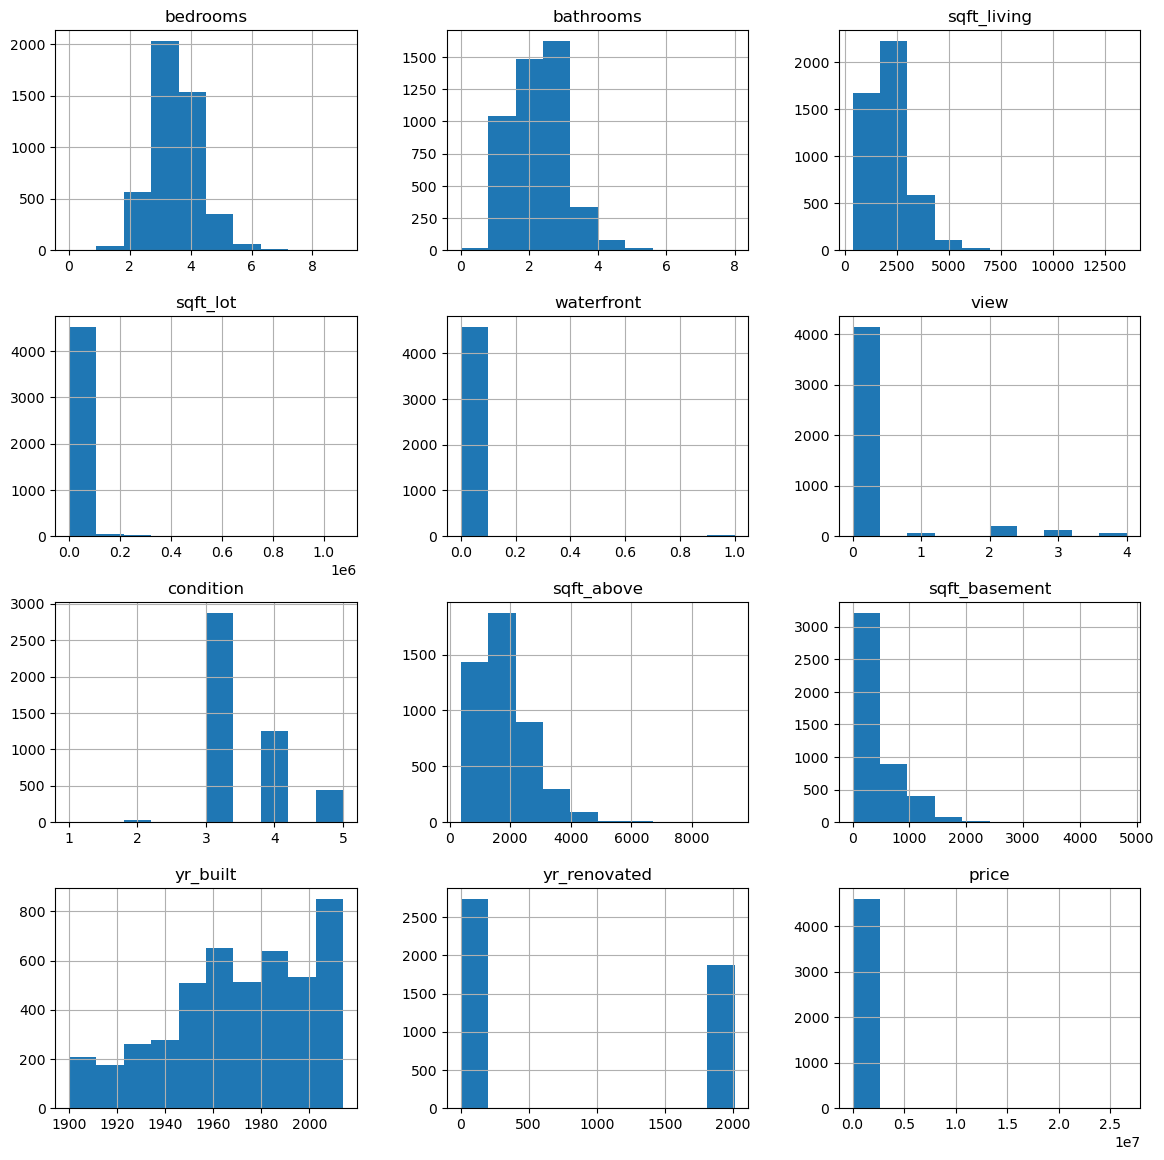

In [8]:
hp.hist(figsize=(14,14))

# Data Cleaning/Preprocessing

# 1. Formatting Columns

In [9]:
hp.dtypes

date              object
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors            object
waterfront       float64
view             float64
condition        float64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
cityzip           object
state             object
country           object
price            float64
dtype: object

In [10]:
#format columns
# Strip extra whitespace from strings
# Could also go further and convert everything to lowercase, collapse extra internal spaces, etc...
string_columns = hp.select_dtypes(["object"])
hp[string_columns.columns] = string_columns.apply(lambda x: x.str.strip())


hp['bathrooms'] = hp['bathrooms'].round()

# 2. Renaming Columns for better Understanding

In [11]:
hp.columns = [col.upper() for col in hp.columns]
hp.columns = ["DATE","NUM_OF_BEDROOMS","NUM_OF_BATHROOMS","LIVING_AREA_sqft","LOT_AREA_sqft", "FLOORS","WATER FRONT","VIEW_RATING","CONDITION_RATING", "ABOVE_BASEMENT_sqft", "BASEMENT_sqft", "YEAR_BUILT", "YEAR_RENOVATED","STREET","CITYZIP ","STATE","COUNTRY","PRICE"]


# 3. Typecasting

In [12]:
hp.dtypes

DATE                    object
NUM_OF_BEDROOMS        float64
NUM_OF_BATHROOMS       float64
LIVING_AREA_sqft         int64
LOT_AREA_sqft            int64
FLOORS                  object
WATER FRONT            float64
VIEW_RATING            float64
CONDITION_RATING       float64
ABOVE_BASEMENT_sqft      int64
BASEMENT_sqft            int64
YEAR_BUILT               int64
YEAR_RENOVATED           int64
STREET                  object
CITYZIP                 object
STATE                   object
COUNTRY                 object
PRICE                  float64
dtype: object

In [13]:
pd.options.display.float_format = '{:,.1f}'.format
hp.PRICE = hp.PRICE.astype(float)


# Turn date string into an actual date object
hp["DATE"] = pd.to_datetime(hp["DATE"])

In [14]:
hp.dtypes

DATE                   datetime64[ns]
NUM_OF_BEDROOMS               float64
NUM_OF_BATHROOMS              float64
LIVING_AREA_sqft                int64
LOT_AREA_sqft                   int64
FLOORS                         object
WATER FRONT                   float64
VIEW_RATING                   float64
CONDITION_RATING              float64
ABOVE_BASEMENT_sqft             int64
BASEMENT_sqft                   int64
YEAR_BUILT                      int64
YEAR_RENOVATED                  int64
STREET                         object
CITYZIP                        object
STATE                          object
COUNTRY                        object
PRICE                         float64
dtype: object

# 4. Dictionary Mapping

In [15]:
hp["FLOORS"].value_counts()

FLOORS
1        2169
2        1816
1.5       447
3         126
2.5        41
one         4
two         3
three       3
3.5         2
Name: count, dtype: int64

In [16]:
word_to_num = {'one': 1, 'two': 2, 'three': 3}
hp['FLOORS'] = hp['FLOORS'].replace(word_to_num)

hp['FLOORS'] = hp['FLOORS'].astype(float)
hp.dtypes

DATE                   datetime64[ns]
NUM_OF_BEDROOMS               float64
NUM_OF_BATHROOMS              float64
LIVING_AREA_sqft                int64
LOT_AREA_sqft                   int64
FLOORS                        float64
WATER FRONT                   float64
VIEW_RATING                   float64
CONDITION_RATING              float64
ABOVE_BASEMENT_sqft             int64
BASEMENT_sqft                   int64
YEAR_BUILT                      int64
YEAR_RENOVATED                  int64
STREET                         object
CITYZIP                        object
STATE                          object
COUNTRY                        object
PRICE                         float64
dtype: object

In [17]:
hp["FLOORS"].value_counts()

FLOORS
1.0    2173
2.0    1819
1.5     447
3.0     129
2.5      41
3.5       2
Name: count, dtype: int64

# 5. Deleting Duplicate Rows

In [18]:
hp.shape

(4619, 18)

In [19]:
len(hp)

4619

In [20]:
duplicate_rows = hp[hp.duplicated()]
hp.drop_duplicates(inplace=True)
duplicate_rows

DATE  NUM_OF_BEDROOMS  NUM_OF_BATHROOMS  LIVING_AREA_sqft  \
4601 2014-06-04              3.0               2.0              2430   
4602 2014-05-13              3.0               2.0              1240   
4603 2014-06-30              4.0               2.0              2120   
4604 2014-06-23              4.0               2.0              1700   
4605 2014-05-23              2.0               1.0              1680   
4606 2014-05-19              3.0               1.0              1080   
4607 2014-06-06              4.0               2.0              1900   
4608 2014-05-20              4.0               2.0              1940   
4609 2014-06-03              3.0               2.0              1680   
4610 2014-07-07              3.0               2.0              1720   
4611 2014-05-29              3.0               2.0              1360   
4612 2014-06-13              5.0               3.0              3320   
4613 2014-07-02              4.0               2.0              2430   
4614 2014-07-07              4.0               3.0              3990   
4615 2014-07-01              3.0               1.0              1150   
4616 2014-05-19              3.0               2.0              1690   
4617 2014-07-08              2.0               2.0              1090   
4618 2014-06-25              6.0               2.0              1900   

      LOT_AREA_sqft  FLOORS  WATER FRONT  VIEW_RATING  CONDITION_RATING  \
4601           5500     2.0          0.0          0.0               3.0   
4602           7735     1.0          0.0          0.0               4.0   
4603           3360     2.0          0.0          0.0               3.0   
4604          20283     1.5          0.0          0.0               3.0   
4605           6500     1.0          0.0          0.0               4.0   
4606          21043     1.0          0.0          0.0               3.0   
4607           8600     1.0          0.0          0.0               4.0   
4608           6909     1.0          0.0          0.0               4.0   
4609          57063     2.0          0.0          0.0               4.0   
4610           3012     2.0          0.0          0.0               3.0   
4611           1016     3.0          0.0          0.0               3.0   
4612          23760     2.0          0.0          0.0               4.0   
4613           4748     1.5          0.0          0.0               3.0   
4614           9786     2.0          0.0          0.0               3.0   
4615           6000     1.5          0.0          0.0               3.0   
4616           1613     2.0          0.0          0.0               3.0   
4617           2686     2.0          0.0          0.0               3.0   
4618           8240     1.0          0.0          0.0               2.0   

      ABOVE_BASEMENT_sqft  BASEMENT_sqft  YEAR_BUILT  YEAR_RENOVATED  \
4601                 1810            620        1989               0   
4602                 1240              0        1957            2001   
4603                 2120              0        1905            2010   
4604                 1340            360        1965            1993   
4605                 1140            540        1941            1998   
4606                 1080              0        1942            1999   
4607                 1900              0        1975               0   
4608                  970            970        1941            1998   
4609                 1680              0        1989               0   
4610                 1720              0        2011               0   
4611                 1310             50        2003               0   
4612                 2190           1130        1975               0   
4613                 1630            800        1928            1954   
4614                 3990              0        2004            2003   
4615                 1150              0        1927            2011   
4616                 1150            540        2014            

In [21]:
hp.shape

(4601, 18)

In [22]:
len(hp)

4601

# 6. Column Splitting

In [23]:
hp.dtypes

DATE                   datetime64[ns]
NUM_OF_BEDROOMS               float64
NUM_OF_BATHROOMS              float64
LIVING_AREA_sqft                int64
LOT_AREA_sqft                   int64
FLOORS                        float64
WATER FRONT                   float64
VIEW_RATING                   float64
CONDITION_RATING              float64
ABOVE_BASEMENT_sqft             int64
BASEMENT_sqft                   int64
YEAR_BUILT                      int64
YEAR_RENOVATED                  int64
STREET                         object
CITYZIP                        object
STATE                          object
COUNTRY                        object
PRICE                         float64
dtype: object

In [24]:
print(hp.iloc[:, -4])

#print(hp['CITYZIP'])

0        Shoreline 98133
1          Seattle 98119
2             Kent 98042
3         Bellevue 98008
4          Redmond 98052
              ...       
4596      Kirkland 98033
4597       Seattle 98126
4598       Seattle 98115
4599     Sammamish 98075
4600    FederalWay 98003
Name: CITYZIP , Length: 4601, dtype: object


In [25]:
# Split 'cityzip' into 'city' and 'zip' columns
hp[['CITY', 'ZIP']] = hp.iloc[:, -4].str.split(' ', expand=True)

# Drop the original 'cityzip' column if needed
# hp.drop('cityzip', axis=1, inplace=True)

# Display the DataFrame with the new columns
print(hp.head())


        DATE  NUM_OF_BEDROOMS  NUM_OF_BATHROOMS  LIVING_AREA_sqft  \
0 2014-05-02              3.0               2.0              1340   
1 2014-05-02              5.0               2.0              3650   
2 2014-05-02              3.0               2.0              1930   
3 2014-05-02              3.0               2.0              2000   
4 2014-05-02              4.0               2.0              1940   

   LOT_AREA_sqft  FLOORS  WATER FRONT  VIEW_RATING  CONDITION_RATING  \
0           7912     1.5          0.0          0.0               3.0   
1           9050     2.0          0.0          4.0               5.0   
2          11947     1.0          0.0          0.0               4.0   
3           8030     1.0          0.0          0.0               4.0   
4          10500     1.0          0.0          0.0               4.0   

   ABOVE_BASEMENT_sqft  BASEMENT_sqft  YEAR_BUILT  YEAR_RENOVATED  \
0                 1340              0        1955            2005   
1             

# 7. Filling Null Values

In [26]:
hp.isnull().sum()

DATE                   0
NUM_OF_BEDROOMS        5
NUM_OF_BATHROOMS       7
LIVING_AREA_sqft       0
LOT_AREA_sqft          0
FLOORS                 8
WATER FRONT            8
VIEW_RATING            9
CONDITION_RATING       9
ABOVE_BASEMENT_sqft    0
BASEMENT_sqft          0
YEAR_BUILT             0
YEAR_RENOVATED         0
STREET                 0
CITYZIP                0
STATE                  0
COUNTRY                0
PRICE                  0
CITY                   0
ZIP                    0
dtype: int64

In [27]:
# Fill null values in 'NUM_OF_BEDROOMS' with the mode
mode_NUM_OF_BEDROOMS = hp['NUM_OF_BEDROOMS'].mode()[0]  # Calculates the mode
hp['NUM_OF_BEDROOMS'] = hp['NUM_OF_BEDROOMS'].fillna(mode_NUM_OF_BEDROOMS)

# Fill null values in 'NUM_OF_BATHROOMS' with the mode
mode_NUM_OF_BATHROOMS = hp['NUM_OF_BATHROOMS'].mode()[0]  # Calculate the mode
hp['NUM_OF_BATHROOMS'] = hp['NUM_OF_BATHROOMS'].fillna(mode_NUM_OF_BATHROOMS)

# Fill null values in 'NUM_OF_BEDROOMS' with the mode
mode_FLOORS = hp['FLOORS'].mode()[0]  # Calculates the mode
hp['FLOORS'] = hp['FLOORS'].fillna(mode_FLOORS)

# Fill null values in 'NUM_OF_BEDROOMS' with the mode
mode_WATERFRONT = hp['WATER FRONT'].mode()[0]  # Calculates the mode
hp['WATER FRONT'] = hp['WATER FRONT'].fillna(mode_WATERFRONT)

# Fill null values in 'NUM_OF_BEDROOMS' with the mode
mode_VIEW_RATING = hp['VIEW_RATING'].mode()[0]  # Calculates the mode
hp['VIEW_RATING'] = hp['VIEW_RATING'].fillna(mode_VIEW_RATING)

# Fill null values in 'NUM_OF_BEDROOMS' with the mode
mode_CONDITION_RATING  = hp['CONDITION_RATING'].mode()[0]  # Calculates the mode
hp['CONDITION_RATING'] = hp['CONDITION_RATING'].fillna(mode_NUM_OF_BEDROOMS)

In [28]:
hp.isnull().sum()

DATE                   0
NUM_OF_BEDROOMS        0
NUM_OF_BATHROOMS       0
LIVING_AREA_sqft       0
LOT_AREA_sqft          0
FLOORS                 0
WATER FRONT            0
VIEW_RATING            0
CONDITION_RATING       0
ABOVE_BASEMENT_sqft    0
BASEMENT_sqft          0
YEAR_BUILT             0
YEAR_RENOVATED         0
STREET                 0
CITYZIP                0
STATE                  0
COUNTRY                0
PRICE                  0
CITY                   0
ZIP                    0
dtype: int64

# 8. Feature Engineering

In [29]:
# Add a new feature for the total square feet
hp["TOTAL_HOUSE_AREA_sqft"] = hp["ABOVE_BASEMENT_sqft"] + hp["BASEMENT_sqft"]
hp.describe()

DATE  NUM_OF_BEDROOMS  NUM_OF_BATHROOMS  \
count                           4601          4,601.0           4,601.0   
mean   2014-06-07 03:24:41.156270336              3.4               2.1   
min              2014-05-02 00:00:00              0.0               0.0   
25%              2014-05-21 00:00:00              3.0               2.0   
50%              2014-06-09 00:00:00              3.0               2.0   
75%              2014-06-24 00:00:00              4.0               2.0   
max              2014-07-10 00:00:00              9.0               8.0   
std                              NaN              0.9               0.8   

       LIVING_AREA_sqft  LOT_AREA_sqft  FLOORS  WATER FRONT  VIEW_RATING  \
count           4,601.0        4,601.0 4,601.0      4,601.0      4,601.0   
mean            2,139.3       14,855.6     1.5          0.0          0.2   
min               370.0          638.0     1.0          0.0          0.0   
25%             1,460.0        5,001.0     1.0          0.0          0.0   
50%             1,980.0        7,683.0     1.5          0.0          0.0   
75%             2,620.0       11,005.0     2.0          0.0          0.0   
max            13,540.0    1,074,218.0     3.5          1.0          4.0   
std               963.1       35,881.1     0.5          0.1          0.8   

       CONDITION_RATING  ABOVE_BASEMENT_sqft  BASEMENT_sqft  YEAR_BUILT  \
count           4,601.0              4,601.0        4,601.0     4,601.0   
mean                3.5              1,827.3          312.0     1,970.8   
min                 1.0                370.0            0.0     1,900.0   
25%                 3.0              1,190.0            0.0     1,951.0   
50%                 3.0              1,590.0            0.0     1,976.0   
75%                 4.0              2,300.0          610.0     1,997.0   
max                 5.0              9,410.0        4,820.0     2,014.0   
std                 0.7                862.1          464.1        29.7   

       YEAR_RENOVATED        PRICE  TOTAL_HOUSE_AREA_sqft  
count         4,601.0      4,601.0                4,601.0  
mean            808.9    551,889.8                2,139.3  
min               0.0          0.0                  370.0  
25%               0.0    322,500.0                1,460.0  
50%               0.0    460,886.9                1,980.0  
75%           1,999.0    654,950.0                2,620.0  
max           2,014.0 26,590,000.0               13,540.0  
std             979.5    563,795.3                  963.1

# 9. Invalid Column Correction

In our dataset, we have two columns namely YEAR_RENOVATED AND YEAR_BUILT which has some wrong data where built year is greater than renovated year. How can one can renovate without building a house.

In [30]:
invalid_rows = hp[(hp['YEAR_BUILT'] > hp['YEAR_RENOVATED']) & (hp['YEAR_RENOVATED'] != 0)]
invalid_rows

DATE  NUM_OF_BEDROOMS  NUM_OF_BATHROOMS  LIVING_AREA_sqft  \
31   2014-05-02              4.0               2.0              2860   
60   2014-05-02              4.0               2.0              3310   
61   2014-05-02              3.0               2.0              2680   
64   2014-05-03              4.0               3.0              2920   
68   2014-05-04              2.0               2.0              2680   
...         ...              ...               ...               ...   
4535 2014-06-23              3.0               2.0              1270   
4542 2014-07-08              3.0               3.0              2830   
4555 2014-06-19              4.0               2.0              2850   
4564 2014-06-25              3.0               2.0              1230   
4572 2014-07-01              4.0               2.0              3350   

      LOT_AREA_sqft  FLOORS  WATER FRONT  VIEW_RATING  CONDITION_RATING  \
31             3345     2.0          0.0          0.0               3.0   
60             6500     2.0          0.0          0.0               3.0   
61             5539     2.0          0.0          0.0               3.0   
64             6605     2.0          0.0          0.0               3.0   
68             7392     1.0          0.0          0.0               3.0   
...             ...     ...          ...          ...               ...   
4535           2356     2.0          0.0          0.0               3.0   
4542           3496     2.0          0.0          0.0               3.0   
4555           4650     2.0          0.0          0.0               3.0   
4564           8250     1.0          0.0          0.0               3.0   
4572          46748     2.0          0.0          0.0               3.0   

      ABOVE_BASEMENT_sqft  ...  YEAR_BUILT  YEAR_RENOVATED  \
31                   2190  ...        2004            2003   
60                   3310  ...        2012            1912   
61                   2680  ...        2013            1923   
64                   2920  ...        2012            1912   
68                   2680  ...        2004            2003   
...                   ...  ...         ...             ...   
4535                 1270  ...        2012            1912   
4542                 2830  ...        2012            1912   
4555                 2850  ...        2004            2003   
4564                 1230  ...        1966            1963   
4572                 3350  ...        2004            2003   

                                    STREET           CITYZIP  STATE COUNTRY  \
31                      20120 137th Ave NE  Woodinville 98072    WA     USA   
60                     35229 SE Terrace St   Snoqualmie 98065    WA     USA   
61                      13800 453rd Ave SE    NorthBend 98045    WA     USA   
64                         5608 NE 5th Cir       Renton 98059    WA     USA   
68                       13134 234th Ct NE      Redmond 98053    WA     USA   
...                                    ...                ...   ...     ...   
4535                       4018 S Lilac St      Seattle 98126    WA     USA   
4542  24588-24638 SE Issaquah-Fall City Rd  Woodinville 98072    WA     USA   
4555                    27437 237th Ave SE     Kirkland 98034    WA     USA   
4564                     12410 SE 168th St       Auburn 98092    WA     USA   
4572                     28815 237th Pl SE    NorthBend 98045    WA     USA   

         PRICE         CITY    ZIP TOTAL_HOUSE_AREA_sqft  
31   499,950.0  Woodinville  98072                  2860  
60   555,000.0   Snoqualmie  98065                  3310  
61   459,990.0    NorthBend  98045                  2680  
64   625,000.0       Renton  98059                  2920  
68   775,000.0      Redmond  98053                  2680  
...        ...          ...    ...                   ...  
4535 160,797.0      Seattle  98126                  1270  
4542 673,000.0  Woodinville  98072                  2830  
4555 360,000.0     K

In [31]:
len(invalid_rows)

195

In [32]:
hp.shape

(4601, 21)

In [33]:
hp.drop(invalid_rows.index, inplace=True)

hp

DATE  NUM_OF_BEDROOMS  NUM_OF_BATHROOMS  LIVING_AREA_sqft  \
0    2014-05-02              3.0               2.0              1340   
1    2014-05-02              5.0               2.0              3650   
2    2014-05-02              3.0               2.0              1930   
3    2014-05-02              3.0               2.0              2000   
4    2014-05-02              4.0               2.0              1940   
...         ...              ...               ...               ...   
4596 2014-07-09              4.0               1.0              1600   
4597 2014-06-17              4.0               3.0              3070   
4598 2014-06-20              4.0               1.0              2080   
4599 2014-06-25              3.0               2.0              1790   
4600 2014-07-09              3.0               2.0              1770   

      LOT_AREA_sqft  FLOORS  WATER FRONT  VIEW_RATING  CONDITION_RATING  \
0              7912     1.5          0.0          0.0               3.0   
1              9050     2.0          0.0          4.0               5.0   
2             11947     1.0          0.0          0.0               4.0   
3              8030     1.0          0.0          0.0               4.0   
4             10500     1.0          0.0          0.0               4.0   
...             ...     ...          ...          ...               ...   
4596           5500     1.5          0.0          0.0               4.0   
4597           7201     2.0          0.0          0.0               3.0   
4598           5500     1.0          0.0          0.0               3.0   
4599           8144     2.0          0.0          0.0               3.0   
4600          29004     1.0          0.0          0.0               3.0   

      ABOVE_BASEMENT_sqft  ...  YEAR_BUILT  YEAR_RENOVATED  \
0                    1340  ...        1955            2005   
1                    3370  ...        1921               0   
2                    1930  ...        1966               0   
3                    1000  ...        1963               0   
4                    1140  ...        1976            1992   
...                   ...  ...         ...             ...   
4596                 1600  ...        1946            1989   
4597                 3070  ...        2006               0   
4598                 1040  ...        1941            1994   
4599                 1790  ...        1989               0   
4600                 1770  ...        1959            1989   

                        STREET          CITYZIP  STATE COUNTRY       PRICE  \
0         18810 Densmore Ave N   Shoreline 98133    WA     USA   313,000.0   
1              709 W Blaine St     Seattle 98119    WA     USA 2,384,000.0   
2     26206-26214 143rd Ave SE        Kent 98042    WA     USA   342,000.0   
3              857 170th Pl NE    Bellevue 98008    WA     USA   420,000.0   
4            9105 170th Ave NE     Redmond 98052    WA     USA   550,000.0   
...                        ...               ...   ...     ...         ...   
4596          9510 28th Ave NW    Kirkland 98033    WA     USA   625,000.0   
4597            5351 NE 4th Ct     Seattle 98126    WA     USA   535,000.0   
4598         7520 Jones Ave NW     Seattle 98115    WA     USA   480,000.0   
4599          907 221st Ave NE   Sammamish 98075    WA     USA   583,000.0   
4600          2253 SW 313th St  FederalWay 98003    WA     USA   215,000.0   

            CITY    ZIP TOTAL_HOUSE_AREA_sqft  
0      Shoreline  98133                  1340  
1        Seattle  98119                  3650  
2           Kent  98042                  1930  
3       Bellevue  98008                  2000  
4        Redmond  98052                  1940  
...          ...    ...                   ...  
4596    Kirkland  98033                  1600  
4597     Seattle  98126                  3070  
4598     Seattle  98115                  2080  
4599   Sammamish  98075                  1790  
4600  FederalWay  98003            

# 10. Invalid Data Cleaning

In [34]:
len(hp)

4406

In [35]:
hp.shape

(4406, 21)

In [36]:
# Based on the above summary data (and prior EDA!!!), we should get rid of some missing/invalid data
hp = hp[hp["NUM_OF_BEDROOMS"] != ""]
hp = hp[hp["NUM_OF_BATHROOMS"] != ""]
hp = hp[hp["LIVING_AREA_sqft"] > 0]
hp = hp[hp["LOT_AREA_sqft"] > 0]
hp = hp[hp["FLOORS"] > 0]
hp = hp[hp["TOTAL_HOUSE_AREA_sqft"] > 0]
hp = hp[hp["VIEW_RATING"] >= 0]
hp = hp[hp["CONDITION_RATING"] >= 0]
hp = hp[hp["YEAR_BUILT"] > 1900]
hp = hp[hp["PRICE"] > 10000]
hp.describe()

DATE  NUM_OF_BEDROOMS  NUM_OF_BATHROOMS  \
count                           4336          4,336.0           4,336.0   
mean   2014-06-07 04:46:56.236162304              3.4               2.1   
min              2014-05-02 00:00:00              0.0               0.0   
25%              2014-05-21 00:00:00              3.0               2.0   
50%              2014-06-09 00:00:00              3.0               2.0   
75%              2014-06-24 00:00:00              4.0               2.0   
max              2014-07-10 00:00:00              9.0               8.0   
std                              NaN              0.9               0.8   

       LIVING_AREA_sqft  LOT_AREA_sqft  FLOORS  WATER FRONT  VIEW_RATING  \
count           4,336.0        4,336.0 4,336.0      4,336.0      4,336.0   
mean            2,116.4       15,151.6     1.5          0.0          0.2   
min               370.0          638.0     1.0          0.0          0.0   
25%             1,457.5        5,080.0     1.0          0.0          0.0   
50%             1,960.0        7,750.5     1.5          0.0          0.0   
75%             2,580.0       11,200.0     2.0          0.0          0.0   
max            13,540.0    1,074,218.0     3.5          1.0          4.0   
std               951.0       36,647.2     0.5          0.1          0.8   

       CONDITION_RATING  ABOVE_BASEMENT_sqft  BASEMENT_sqft  YEAR_BUILT  \
count           4,336.0              4,336.0        4,336.0     4,336.0   
mean                3.5              1,801.2          315.3     1,969.6   
min                 1.0                370.0            0.0     1,901.0   
25%                 3.0              1,180.0            0.0     1,950.0   
50%                 3.0              1,570.0            0.0     1,973.0   
75%                 4.0              2,250.0          620.0     1,994.0   
max                 5.0              9,410.0        4,820.0     2,014.0   
std                 0.7                844.9          464.2        29.0   

       YEAR_RENOVATED        PRICE  TOTAL_HOUSE_AREA_sqft  
count         4,336.0      4,336.0                4,336.0  
mean            753.1    555,600.5                2,116.4  
min               0.0     80,000.0                  370.0  
25%               0.0    325,000.0                1,457.5  
50%               0.0    461,000.0                1,960.0  
75%           1,998.0    651,375.0                2,580.0  
max           2,014.0 26,590,000.0               13,540.0  
std             968.5    572,364.4                  951.0

# 11. Dropping Columns

In [37]:
hp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4336 entries, 0 to 4600
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   DATE                   4336 non-null   datetime64[ns]
 1   NUM_OF_BEDROOMS        4336 non-null   float64       
 2   NUM_OF_BATHROOMS       4336 non-null   float64       
 3   LIVING_AREA_sqft       4336 non-null   int64         
 4   LOT_AREA_sqft          4336 non-null   int64         
 5   FLOORS                 4336 non-null   float64       
 6   WATER FRONT            4336 non-null   float64       
 7   VIEW_RATING            4336 non-null   float64       
 8   CONDITION_RATING       4336 non-null   float64       
 9   ABOVE_BASEMENT_sqft    4336 non-null   int64         
 10  BASEMENT_sqft          4336 non-null   int64         
 11  YEAR_BUILT             4336 non-null   int64         
 12  YEAR_RENOVATED         4336 non-null   int64         
 13  STREET  

In [38]:
hp = hp.drop(columns = ['DATE','COUNTRY','STREET','STATE'])

In [39]:
print(hp.iloc[:, -5])

0        Shoreline 98133
1          Seattle 98119
2             Kent 98042
3         Bellevue 98008
4          Redmond 98052
              ...       
4596      Kirkland 98033
4597       Seattle 98126
4598       Seattle 98115
4599     Sammamish 98075
4600    FederalWay 98003
Name: CITYZIP , Length: 4336, dtype: object


In [40]:
# Assuming 'index_to_drop' is the index of the column you want to drop
hp.drop(hp.columns[-5], axis=1, inplace=True)

In [41]:
hp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4336 entries, 0 to 4600
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   NUM_OF_BEDROOMS        4336 non-null   float64
 1   NUM_OF_BATHROOMS       4336 non-null   float64
 2   LIVING_AREA_sqft       4336 non-null   int64  
 3   LOT_AREA_sqft          4336 non-null   int64  
 4   FLOORS                 4336 non-null   float64
 5   WATER FRONT            4336 non-null   float64
 6   VIEW_RATING            4336 non-null   float64
 7   CONDITION_RATING       4336 non-null   float64
 8   ABOVE_BASEMENT_sqft    4336 non-null   int64  
 9   BASEMENT_sqft          4336 non-null   int64  
 10  YEAR_BUILT             4336 non-null   int64  
 11  YEAR_RENOVATED         4336 non-null   int64  
 12  PRICE                  4336 non-null   float64
 13  CITY                   4336 non-null   object 
 14  ZIP                    4336 non-null   object 
 15  TOTAL_HOU

# 12. Removing Outliers

C:\Users\Satvik Jonnalagadda\AppData\Local\Temp\ipykernel_6788\4179215316.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(hp['LOT_AREA_sqft'])


<Axes: xlabel='LOT_AREA_sqft', ylabel='Density'>

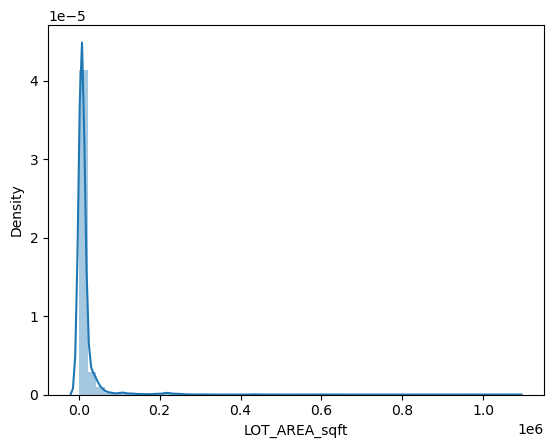

In [42]:
import seaborn as sns
sns.distplot(hp['LOT_AREA_sqft'])

C:\Users\Satvik Jonnalagadda\AppData\Local\Temp\ipykernel_6788\1874929932.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(hp['PRICE'])


<Axes: xlabel='PRICE', ylabel='Density'>

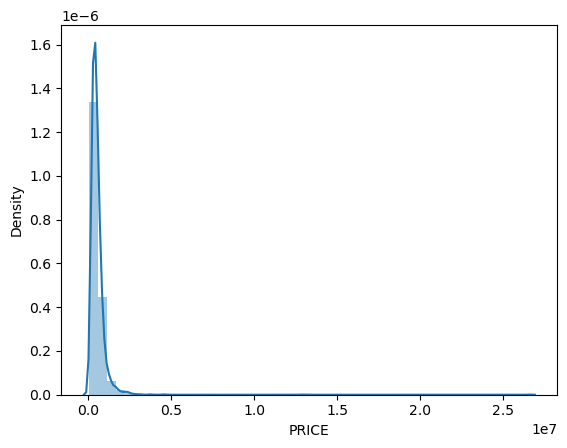

In [43]:
sns.distplot(hp['PRICE'])

<Axes: >

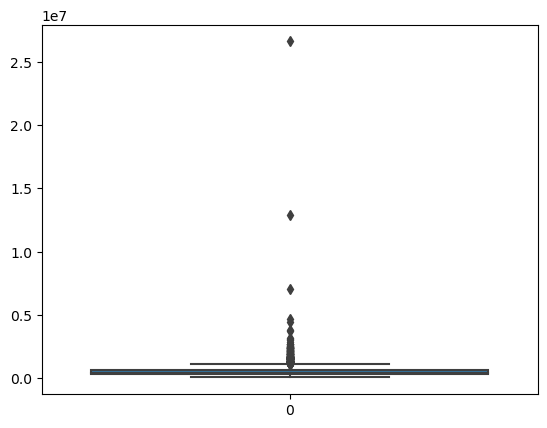

In [44]:
#to see the outliers clearly
sns.boxplot(hp['PRICE'])

<Axes: >

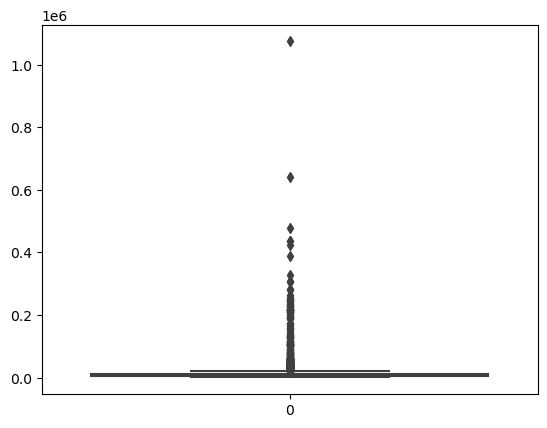

In [45]:
#to see the outliers clearly
sns.boxplot(hp['LOT_AREA_sqft'])

In [46]:
q1=hp['PRICE'].quantile(0.25)
q3=hp['PRICE'].quantile(0.75)
iqr=q3-q1
upper_limit=q3+(1.5*iqr)
lower_limit=q1-(1.5*iqr)
upper_limit,lower_limit
hp.loc[(hp['PRICE']>upper_limit) | (hp['PRICE']<lower_limit) ]


NUM_OF_BEDROOMS  NUM_OF_BATHROOMS  LIVING_AREA_sqft  LOT_AREA_sqft  \
1                 5.0               2.0              3650           9050   
11                4.0               2.0              2920           4000   
14                5.0               3.0              2910           9480   
99                5.0               4.0              4010           8510   
122               7.0               8.0             13540         307752   
...               ...               ...               ...            ...   
4511              5.0               6.0              7050          42840   
4539              5.0               4.0              5850          22885   
4570              4.0               4.0              6640          53330   
4581              6.0               3.0              4710          11000   
4588              3.0               3.0              2500           5568   

      FLOORS  WATER FRONT  VIEW_RATING  CONDITION_RATING  ABOVE_BASEMENT_sqft  \
1        2.0          0.0          4.0               5.0                 3370   
11       1.5          0.0          0.0               5.0                 1910   
14       1.5          0.0          0.0               3.0                 2910   
99       2.0          0.0          1.0               5.0                 2850   
122      3.0          0.0          4.0               3.0                 9410   
...      ...          ...          ...               ...                  ...   
4511     1.0          0.0          2.0               4.0                 4320   
4539     2.0          0.0          2.0               4.0                 4670   
4570     2.0          0.0          0.0               3.0                 6640   
4581     2.0          0.0          3.0               3.0                 3690   
4588     2.0          0.0          0.0               5.0                 2500   

      BASEMENT_sqft  YEAR_BUILT  YEAR_RENOVATED       PRICE       CITY    ZIP  \
1               280        1921               0 2,384,000.0    Seattle  98119   
11             1010        1909            1988 1,400,000.0    Seattle  98105   
14                0        1939            1969 1,200,000.0    Seattle  98105   
99             1160        1971               0 1,395,000.0    Seattle  98105   
122            4130        1999               0 2,280,000.0    Redmond  98053   
...             ...         ...             ...         ...        ...    ...   
4511           2730        1978            2000 3,800,000.0     Auburn  98002   
4539           1180        1978            2000 1,700,000.0    Seattle  98106   
4570              0        1993               0 1,820,000.0    Seattle  98115   
4581           1020        1931               0 2,180,000.0     Renton  98056   
4588              0        1905               0 1,185,001.0  NorthBend  98045   

      TOTAL_HOUSE_AREA_sqft  
1                      3650  
11                     2920  
14                     2910  
99                     4010  
122                   13540  
...                     ...  
4511                   7050  
4539                   5850  
4570                   6640  
4581                   4710  
4588                   2500  

[231 rows x 16 columns]

In [47]:
hp=hp.loc[(hp['PRICE']<upper_limit) & (hp['PRICE']>lower_limit)]


In [48]:
q1=hp['LOT_AREA_sqft'].quantile(0.25)
q3=hp['LOT_AREA_sqft'].quantile(0.75)
iqr=q3-q1
upper_limit=q3+(1.5*iqr)
lower_limit=q1-(1.5*iqr)
upper_limit,lower_limit
hp.loc[(hp['LOT_AREA_sqft']>upper_limit) | (hp['LOT_AREA_sqft']<lower_limit) ]


NUM_OF_BEDROOMS  NUM_OF_BATHROOMS  LIVING_AREA_sqft  LOT_AREA_sqft  \
7                 4.0               2.0              2710          35868   
8                 3.0               2.0              2430          88426   
28                5.0               2.0              2820          67518   
34                4.0               2.0              3630          42884   
35                3.0               2.0              3240          33151   
...               ...               ...               ...            ...   
4562              3.0               2.0              3320         478288   
4566              3.0               2.0              1940         219527   
4569              1.0               1.0               930          29258   
4589              3.0               2.0              1440          28516   
4600              3.0               2.0              1770          29004   

      FLOORS  WATER FRONT  VIEW_RATING  CONDITION_RATING  ABOVE_BASEMENT_sqft  \
7        2.0          0.0          0.0               3.0                 2710   
8        1.0          0.0          0.0               4.0                 1570   
28       2.0          0.0          0.0               3.0                 2820   
34       1.5          0.0          0.0               3.0                 2300   
35       2.0          0.0          2.0               3.0                 3240   
...      ...          ...          ...               ...                  ...   
4562     1.5          0.0          3.0               4.0                 2260   
4566     1.0          0.0          0.0               3.0                 1940   
4569     1.0          0.0          0.0               3.0                  930   
4589     1.0          0.0          0.0               4.0                 1440   
4600     1.0          0.0          0.0               3.0                 1770   

      BASEMENT_sqft  YEAR_BUILT  YEAR_RENOVATED     PRICE         CITY    ZIP  \
7                 0        1989               0 482,000.0  MapleValley  98038   
8               860        1985               0 452,500.0    NorthBend  98045   
28                0        1979            2014 675,000.0     Issaquah  98029   
34             1330        1979            2014 400,000.0       Auburn  98092   
35                0        1995               0 604,000.0   FederalWay  98023   
...             ...         ...             ...       ...          ...    ...   
4562           1060        1933            1982 667,000.0      Seattle  98199   
4566              0        1991               0 520,000.0  Woodinville  98072   
4569              0        1941            1994 190,000.0      Seattle  98125   
4589              0        1975               0 456,000.0    Sammamish  98074   
4600              0        1959            1989 215,000.0   FederalWay  98003   

      TOTAL_HOUSE_AREA_sqft  
7                      2710  
8                      2430  
28                     2820  
34                     3630  
35                     3240  
...                     ...  
4562                   3320  
4566                   1940  
4569                    930  
4589                   1440  
4600                   1770  

[487 rows x 16 columns]

In [49]:
hp=hp.loc[(hp['LOT_AREA_sqft']<upper_limit) & (hp['LOT_AREA_sqft']>lower_limit)]


In [50]:
hp.shape

(3618, 16)

In [51]:
hp

NUM_OF_BEDROOMS  NUM_OF_BATHROOMS  LIVING_AREA_sqft  LOT_AREA_sqft  \
0                 3.0               2.0              1340           7912   
2                 3.0               2.0              1930          11947   
3                 3.0               2.0              2000           8030   
4                 4.0               2.0              1940          10500   
5                 2.0               1.0               880           6380   
...               ...               ...               ...            ...   
4595              3.0               2.0              2340           3477   
4596              4.0               1.0              1600           5500   
4597              4.0               3.0              3070           7201   
4598              4.0               1.0              2080           5500   
4599              3.0               2.0              1790           8144   

      FLOORS  WATER FRONT  VIEW_RATING  CONDITION_RATING  ABOVE_BASEMENT_sqft  \
0        1.5          0.0          0.0               3.0                 1340   
2        1.0          0.0          0.0               4.0                 1930   
3        1.0          0.0          0.0               4.0                 1000   
4        1.0          0.0          0.0               4.0                 1140   
5        1.0          0.0          0.0               3.0                  880   
...      ...          ...          ...               ...                  ...   
4595     1.0          0.0          1.0               5.0                 1170   
4596     1.5          0.0          0.0               4.0                 1600   
4597     2.0          0.0          0.0               3.0                 3070   
4598     1.0          0.0          0.0               3.0                 1040   
4599     2.0          0.0          0.0               3.0                 1790   

      BASEMENT_sqft  YEAR_BUILT  YEAR_RENOVATED     PRICE       CITY    ZIP  \
0                 0        1955            2005 313,000.0  Shoreline  98133   
2                 0        1966               0 342,000.0       Kent  98042   
3              1000        1963               0 420,000.0   Bellevue  98008   
4               800        1976            1992 550,000.0    Redmond  98052   
5                 0        1938            1994 490,000.0    Seattle  98115   
...             ...         ...             ...       ...        ...    ...   
4595           1170        1971               0 560,000.0    Seattle  98119   
4596              0        1946            1989 625,000.0   Kirkland  98033   
4597              0        2006               0 535,000.0    Seattle  98126   
4598           1040        1941            1994 480,000.0    Seattle  98115   
4599              0        1989               0 583,000.0  Sammamish  98075   

      TOTAL_HOUSE_AREA_sqft  
0                      1340  
2                      1930  
3                      2000  
4                      1940  
5                       880  
...                     ...  
4595                   2340  
4596                   1600  
4597                   3070  
4598                   2080  
4599                   1790  

[3618 rows x 16 columns]

# Box Plot after removing outliers

<Axes: >

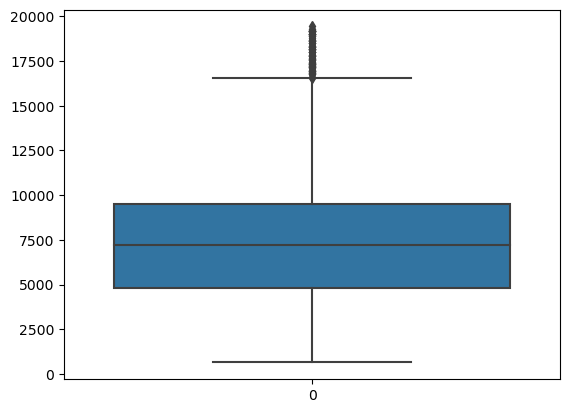

In [52]:
sns.boxplot(hp['LOT_AREA_sqft'])

<Axes: >

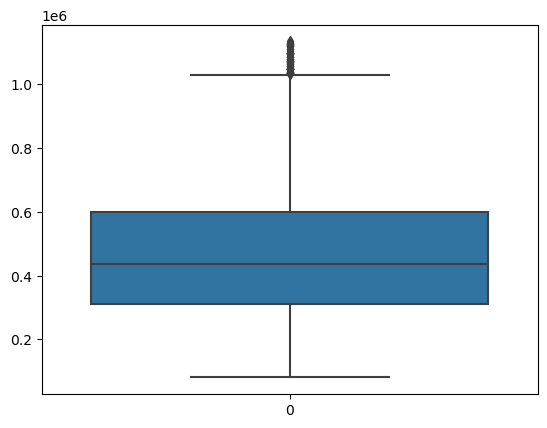

In [53]:
sns.boxplot(hp['PRICE'])

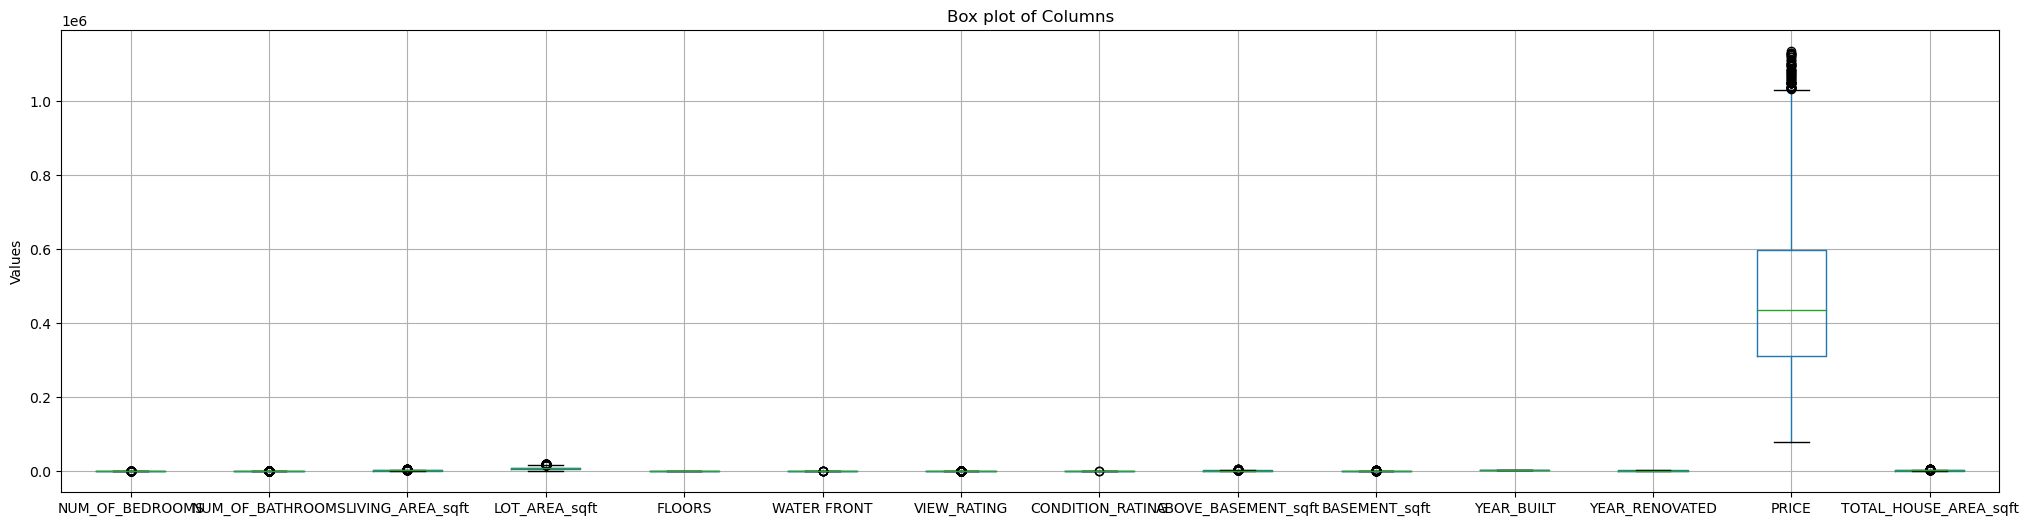

In [54]:
plt.figure(figsize=(25, 6))
hp.boxplot()
plt.ylabel('Values')
plt.title('Box plot of Columns')
plt.show()

# Exploratory Data Analysis

# 1. Dimensions of the dataset

In [55]:
hp.shape

(3618, 16)

# 2. First 5 rows of the dataset

In [56]:
hp.head(5)

NUM_OF_BEDROOMS  NUM_OF_BATHROOMS  LIVING_AREA_sqft  LOT_AREA_sqft  FLOORS  \
0              3.0               2.0              1340           7912     1.5   
2              3.0               2.0              1930          11947     1.0   
3              3.0               2.0              2000           8030     1.0   
4              4.0               2.0              1940          10500     1.0   
5              2.0               1.0               880           6380     1.0   

   WATER FRONT  VIEW_RATING  CONDITION_RATING  ABOVE_BASEMENT_sqft  \
0          0.0          0.0               3.0                 1340   
2          0.0          0.0               4.0                 1930   
3          0.0          0.0               4.0                 1000   
4          0.0          0.0               4.0                 1140   
5          0.0          0.0               3.0                  880   

   BASEMENT_sqft  YEAR_BUILT  YEAR_RENOVATED     PRICE       CITY    ZIP  \
0              0        1955            2005 313,000.0  Shoreline  98133   
2              0        1966               0 342,000.0       Kent  98042   
3           1000        1963               0 420,000.0   Bellevue  98008   
4            800        1976            1992 550,000.0    Redmond  98052   
5              0        1938            1994 490,000.0    Seattle  98115   

   TOTAL_HOUSE_AREA_sqft  
0                   1340  
2                   1930  
3                   2000  
4                   1940  
5                    880

# 3. Datatypes of each Column

In [57]:
hp.dtypes

NUM_OF_BEDROOMS          float64
NUM_OF_BATHROOMS         float64
LIVING_AREA_sqft           int64
LOT_AREA_sqft              int64
FLOORS                   float64
WATER FRONT              float64
VIEW_RATING              float64
CONDITION_RATING         float64
ABOVE_BASEMENT_sqft        int64
BASEMENT_sqft              int64
YEAR_BUILT                 int64
YEAR_RENOVATED             int64
PRICE                    float64
CITY                      object
ZIP                       object
TOTAL_HOUSE_AREA_sqft      int64
dtype: object

# 4. Check for Missing Values

In [58]:
print(hp.isnull().sum())

NUM_OF_BEDROOMS          0
NUM_OF_BATHROOMS         0
LIVING_AREA_sqft         0
LOT_AREA_sqft            0
FLOORS                   0
WATER FRONT              0
VIEW_RATING              0
CONDITION_RATING         0
ABOVE_BASEMENT_sqft      0
BASEMENT_sqft            0
YEAR_BUILT               0
YEAR_RENOVATED           0
PRICE                    0
CITY                     0
ZIP                      0
TOTAL_HOUSE_AREA_sqft    0
dtype: int64


# 5. Summary Statistics

In [59]:
summary_stats = hp.describe()
print(summary_stats)

       NUM_OF_BEDROOMS  NUM_OF_BATHROOMS  LIVING_AREA_sqft  LOT_AREA_sqft  \
count          3,618.0           3,618.0           3,618.0        3,618.0   
mean               3.3               2.0           1,933.2        7,368.9   
std                0.9               0.7             735.2        3,643.6   
min                0.0               0.0             370.0          638.0   
25%                3.0               2.0           1,390.0        4,800.0   
50%                3.0               2.0           1,850.0        7,201.0   
75%                4.0               2.0           2,370.0        9,502.2   
max                9.0               6.0           5,960.0       19,439.0   

       FLOORS  WATER FRONT  VIEW_RATING  CONDITION_RATING  \
count 3,618.0      3,618.0      3,618.0           3,618.0   
mean      1.5          0.0          0.2               3.5   
std       0.5          0.0          0.6               0.7   
min       1.0          0.0          0.0               1.0   
2

# 6. Histogram

grid of histograms, with each histogram showing the distribution of values for a particular numerical feature in the DataFrame.

array([[<Axes: title={'center': 'NUM_OF_BEDROOMS'}>,
        <Axes: title={'center': 'NUM_OF_BATHROOMS'}>,
        <Axes: title={'center': 'LIVING_AREA_sqft'}>,
        <Axes: title={'center': 'LOT_AREA_sqft'}>],
       [<Axes: title={'center': 'FLOORS'}>,
        <Axes: title={'center': 'WATER FRONT'}>,
        <Axes: title={'center': 'VIEW_RATING'}>,
        <Axes: title={'center': 'CONDITION_RATING'}>],
       [<Axes: title={'center': 'ABOVE_BASEMENT_sqft'}>,
        <Axes: title={'center': 'BASEMENT_sqft'}>,
        <Axes: title={'center': 'YEAR_BUILT'}>,
        <Axes: title={'center': 'YEAR_RENOVATED'}>],
       [<Axes: title={'center': 'PRICE'}>,
        <Axes: title={'center': 'TOTAL_HOUSE_AREA_sqft'}>, <Axes: >,
        <Axes: >]], dtype=object)

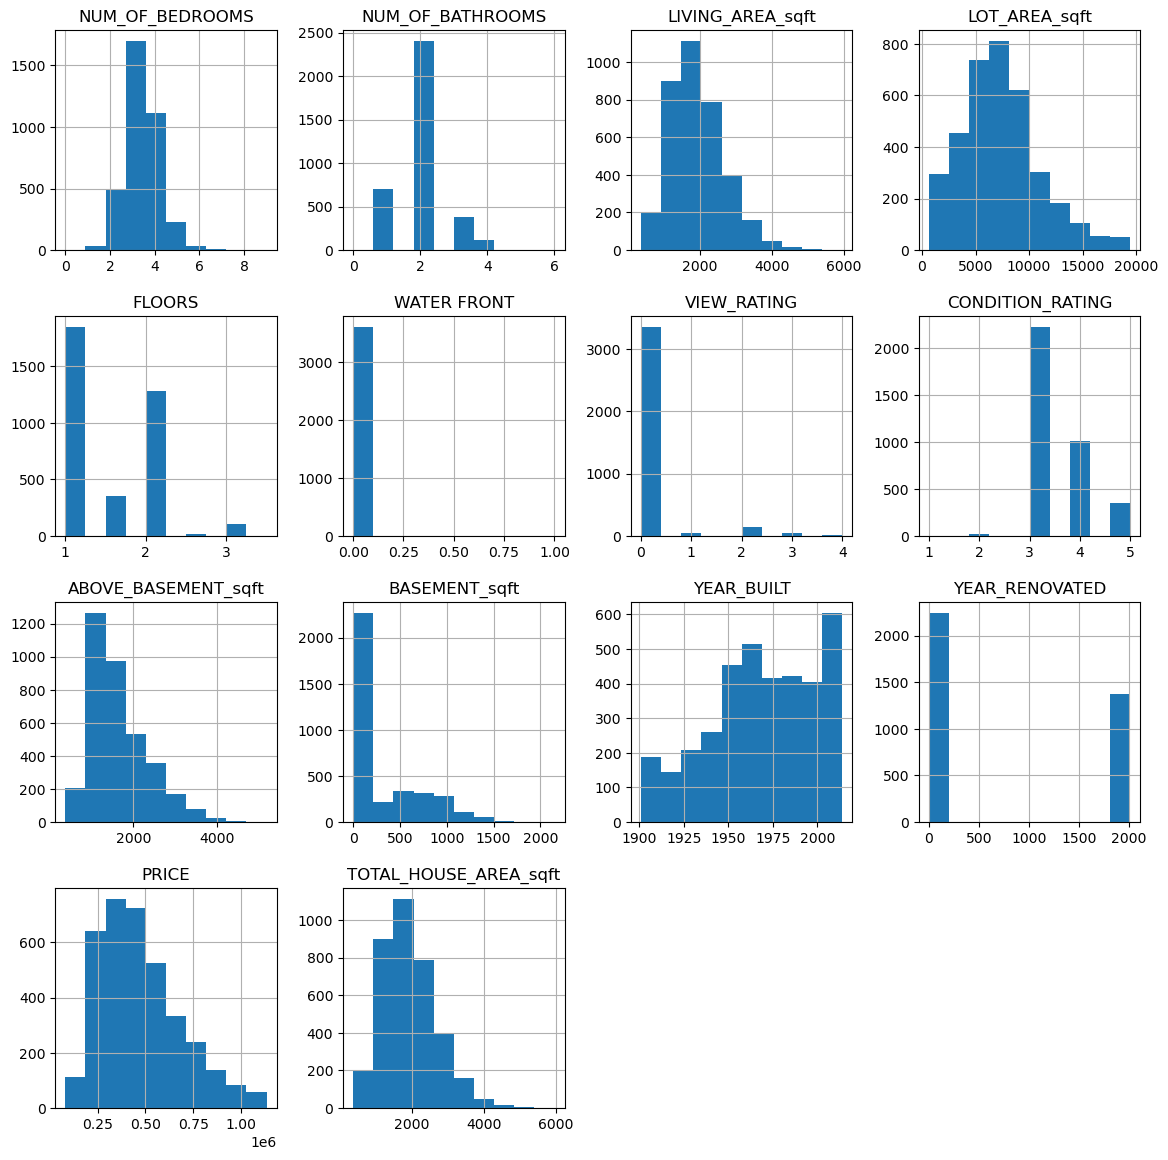

In [60]:
hp.hist(figsize=(14,14))

# 7. Correlation Analysis

correlation matrix helps identify potential relationships between different features, which can be useful for further analysis and modeling.

In [61]:
hp[["NUM_OF_BEDROOMS","NUM_OF_BATHROOMS","LIVING_AREA_sqft","LOT_AREA_sqft", "FLOORS","WATER FRONT","VIEW_RATING","CONDITION_RATING", "ABOVE_BASEMENT_sqft", "BASEMENT_sqft", "YEAR_BUILT", "YEAR_RENOVATED","PRICE","TOTAL_HOUSE_AREA_sqft"]].corr()

NUM_OF_BEDROOMS  NUM_OF_BATHROOMS  LIVING_AREA_sqft  \
NUM_OF_BEDROOMS                    1.0               0.5               0.6   
NUM_OF_BATHROOMS                   0.5               1.0               0.6   
LIVING_AREA_sqft                   0.6               0.6               1.0   
LOT_AREA_sqft                      0.2               0.1               0.3   
FLOORS                             0.1               0.3               0.3   
WATER FRONT                       -0.0               0.0               0.0   
VIEW_RATING                        0.1               0.2               0.2   
CONDITION_RATING                   0.0              -0.1              -0.1   
ABOVE_BASEMENT_sqft                0.5               0.5               0.8   
BASEMENT_sqft                      0.3               0.3               0.4   
YEAR_BUILT                         0.1               0.4               0.3   
YEAR_RENOVATED                    -0.1              -0.2              -0.2   
PRICE                              0.3               0.4               0.6   
TOTAL_HOUSE_AREA_sqft              0.6               0.6               1.0   

                       LOT_AREA_sqft  FLOORS  WATER FRONT  VIEW_RATING  \
NUM_OF_BEDROOMS                  0.2     0.1         -0.0          0.1   
NUM_OF_BATHROOMS                 0.1     0.3          0.0          0.2   
LIVING_AREA_sqft                 0.3     0.3          0.0          0.2   
LOT_AREA_sqft                    1.0    -0.3          0.1          0.1   
FLOORS                          -0.3     1.0          0.0         -0.0   
WATER FRONT                      0.1     0.0          1.0          0.3   
VIEW_RATING                      0.1    -0.0          0.3          1.0   
CONDITION_RATING                 0.1    -0.3          0.0          0.0   
ABOVE_BASEMENT_sqft              0.2     0.5          0.0          0.1   
BASEMENT_sqft                    0.1    -0.3          0.0          0.2   
YEAR_BUILT                       0.0     0.5         -0.0         -0.1   
YEAR_RENOVATED                   0.1    -0.3         -0.0          0.0   
PRICE                            0.0     0.3          0.0          0.2   
TOTAL_HOUSE_AREA_sqft            0.3     0.3          0.0          0.2   

                       CONDITION_RATING  ABOVE_BASEMENT_sqft  BASEMENT_sqft  \
NUM_OF_BEDROOMS                     0.0                  0.5            0.3   
NUM_OF_BATHROOMS                   -0.1                  0.5            0.3   
LIVING_AREA_sqft                   -0.1                  0.8            0.4   
LOT_AREA_sqft                       0.1                  0.2            0.1   
FLOORS                             -0.3                  0.5           -0.3   
WATER FRONT                         0.0                  0.0            0.0   
VIEW_RATING                         0.0                  0.1            0.2   
CONDITION_RATING                    1.0                 -0.2            0.2   
ABOVE_BASEMENT_sqft                -0.2                  1.0           -0.2   
BASEMENT_sqft                       0.2                 -0.2            1.0   
YEAR_BUILT                         -0.4                  0.4           -0.2   
YEAR_RENOVATED                     -0.2                 -0.2            0.1   
PRICE                               0.1                  0.5            0.3   
TOTAL_HOUSE_AREA_sqft              -0.1                  0.8            0.4   

                       YEAR_BUILT  YEAR_RENOVATED  PRICE  \
NUM_OF_BEDROOMS               0.1            -0.1    0.3   
NUM_OF_BATHROOMS              0.4            -0.2    0.4   
LIVING_AREA_sqft              0.3            -0.2    0.6   
LOT_AREA_sqft                 0.0             0.1    0.0   
FLOORS                        0.5            -0.3    0.3   
WATER FRONT                  -0.0            -0.0    0.0   
VIEW_RATING                  -0.1             0.0    0.2   
CONDITION_RATING             -0.4            -0.2    0.1   
ABOVE_BASEMENT_

# From the above correlation analysis, we are gonna extract some important features

In [62]:
# Select features we are interested in
df = hp[["NUM_OF_BEDROOMS","NUM_OF_BATHROOMS","LIVING_AREA_sqft","LOT_AREA_sqft", "FLOORS", "ABOVE_BASEMENT_sqft", "BASEMENT_sqft","PRICE","TOTAL_HOUSE_AREA_sqft"]]

# 17. Clustered Heat Map for Correlation Matrix

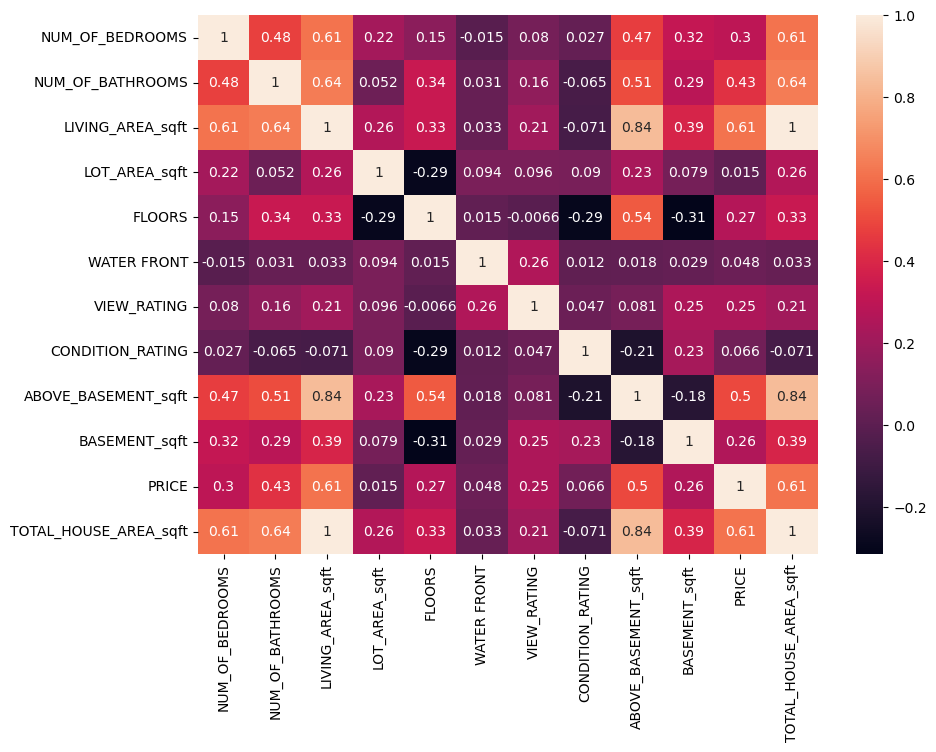

In [63]:
plt.figure(figsize=(10,7))
sns.heatmap(hp.select_dtypes(include='number').drop(['YEAR_BUILT', 'YEAR_RENOVATED'], axis=1).corr(),annot=True);

LIVING_AREA_sqft has the biggest correlation rate with the PRICE, it is also correlating strongly with NUM_OF_BATHROOMS and ABOVE_BASEMENT_sqft.

The biggest correlation is between LIVING_AREA_sqft and ABOVE_BASEMENT_sqft(0.84)

# From Correlation Analysis let's get some results

In [64]:
pd.crosstab(index = hp.CONDITION_RATING , values  = hp.PRICE , columns = "PRICE",aggfunc = "mean")

col_0                PRICE
CONDITION_RATING          
1.0              341,000.0
2.0              257,248.0
3.0              473,148.5
4.0              454,976.4
5.0              541,365.5

From the above correlation matrix, you can find that there is no relation between Condition and Price but when you observe the above result you can find that price is increasing as the rate of house condition is increasing.

# 8. Count Plot 

In [65]:
count=hp["CITY"].value_counts()
count

CITY
Seattle              1340
Renton                237
Bellevue              211
Redmond               166
Kirkland              159
Kent                  145
Issaquah              140
Sammamish             130
Auburn                127
FederalWay            118
Shoreline             104
MapleValley            68
Burien                 64
Woodinville            63
Kenmore                54
Snoqualmie             54
MercerIsland           50
DesMoines              50
LakeForestPark         35
Newcastle              32
Covington              32
NorthBend              31
Duvall                 26
Bothell                26
SeaTac                 25
Enumclaw               23
Tukwila                22
Vashon                 16
NormandyPark           15
Carnation              12
ClydeHill               7
BlackDiamond            6
Pacific                 6
Algona                  4
FallCity                4
Skykomish               3
Medina                  3
Milton                  2
YarrowP

In [66]:
len(count)

44

<Axes: xlabel='CITY'>

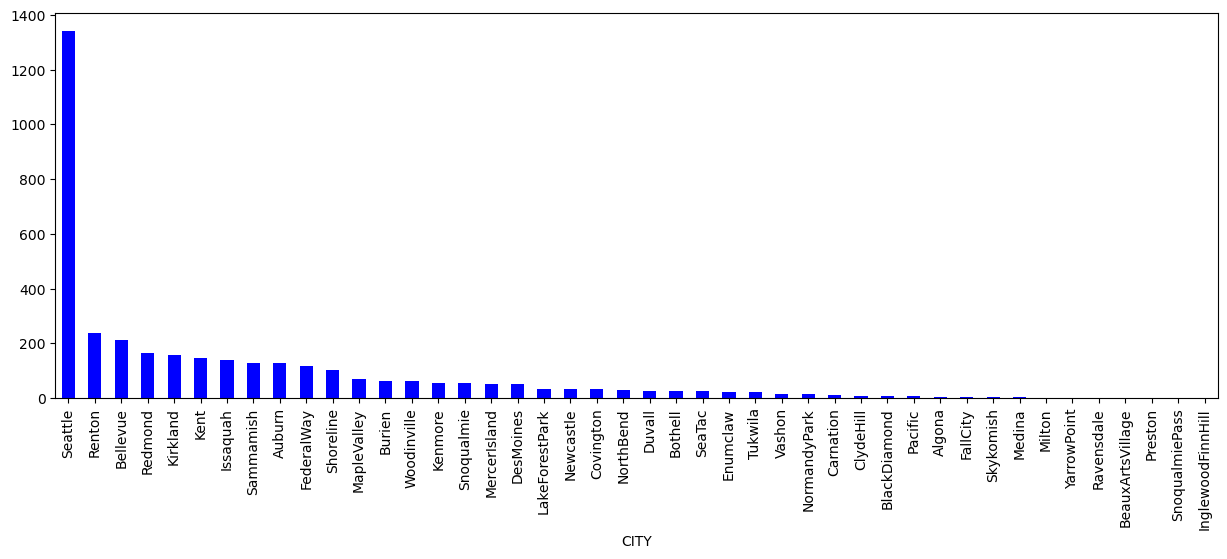

In [67]:
hp.CITY.value_counts().plot(kind = "bar" , figsize =(15 , 5) , color = "Blue")  

<Axes: xlabel='CITY', ylabel='count'>

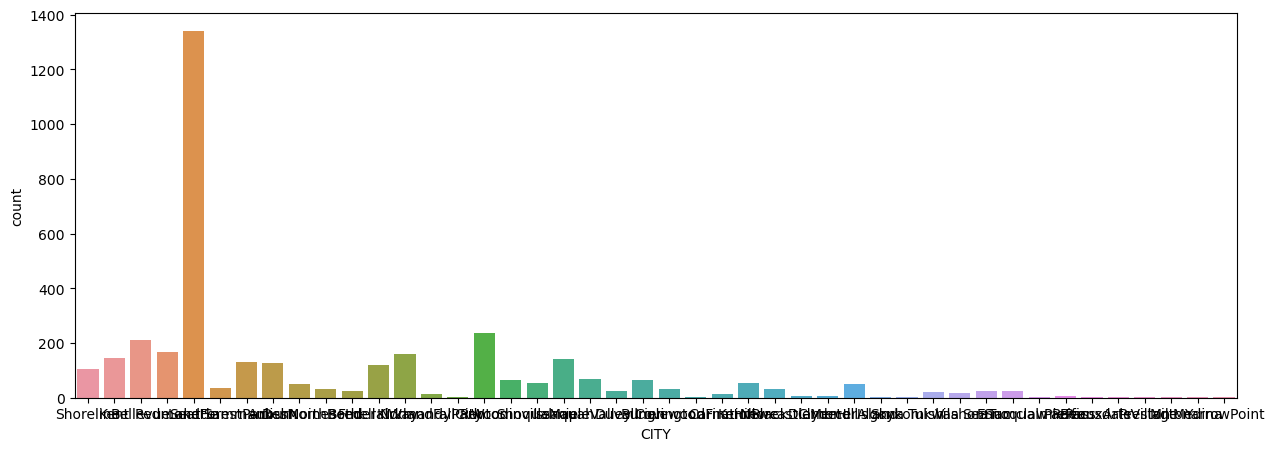

In [68]:
plt.figure(figsize=(15,5))
sns.countplot(x="CITY",data=hp)

# 9. Bar Plot to distinguish House Prices in Different Cities

bar plot showing the mean price for each city, sorted in descending order of mean price.

<Axes: xlabel='CITY'>

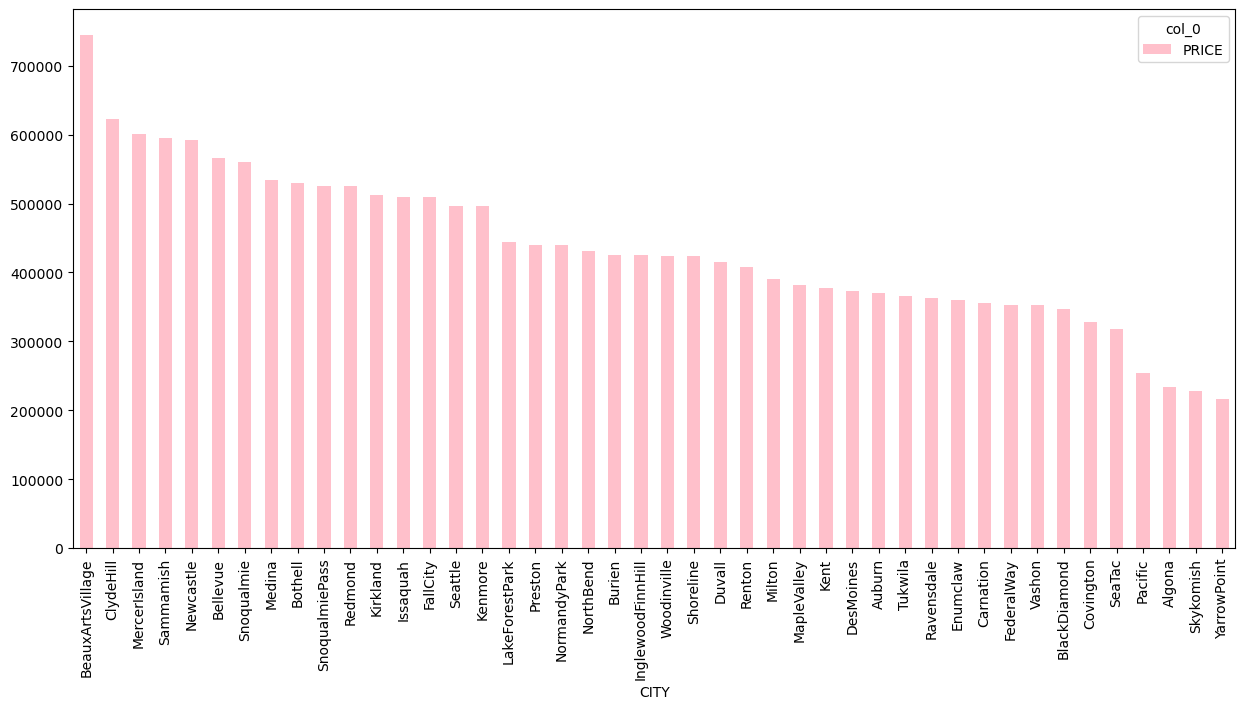

In [69]:
pd.crosstab(index = hp.CITY , columns = "PRICE" , values = hp.PRICE , aggfunc = "mean").sort_values(ascending  = False , by = "PRICE").plot(kind = "bar" , figsize = (15,7) , color = "pink") 

# 10. BOX PLOT b/w LIVING_AREA_sqft and PRICE

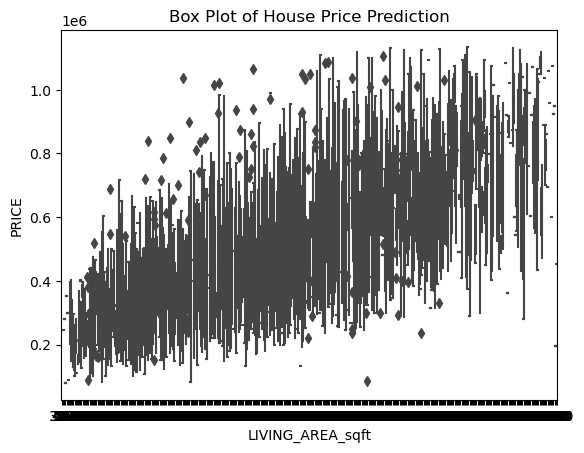

In [70]:
import seaborn as sns

# Plot box plot of a numerical feature
sns.boxplot(x=hp['LIVING_AREA_sqft'], y=hp['PRICE'])
plt.xlabel('LIVING_AREA_sqft')
plt.ylabel('PRICE')
plt.title('Box Plot of House Price Prediction')
plt.show()


# 11. Scatter Plot LIVING_AREA_sqft and ABOVE_BASEMENT_sqft11

<Axes: xlabel='LIVING_AREA_sqft', ylabel='ABOVE_BASEMENT_sqft'>

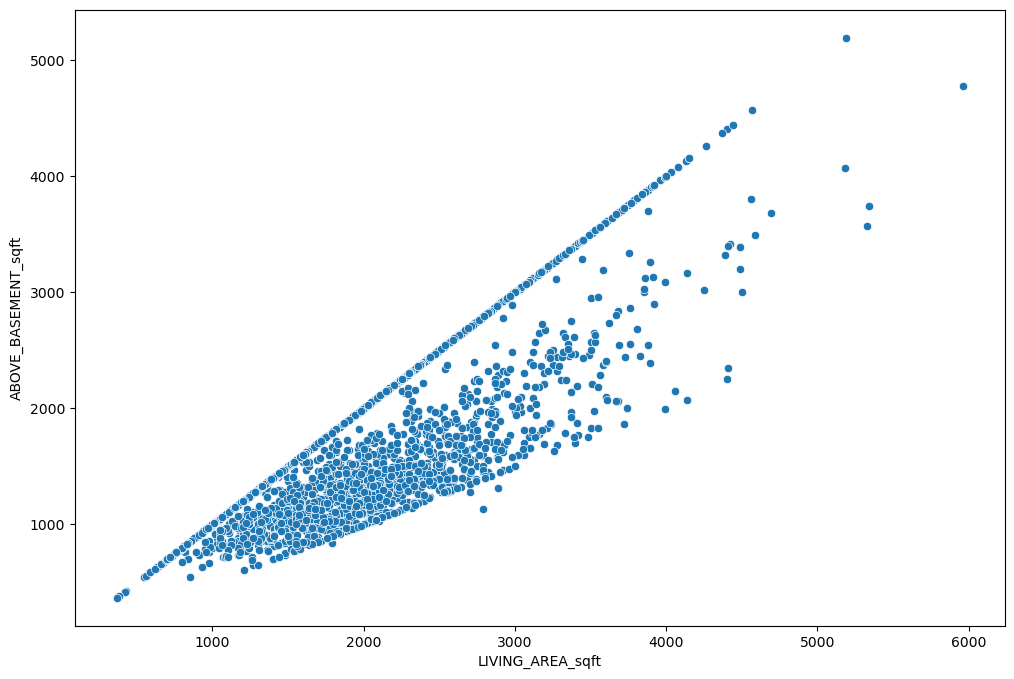

In [71]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.scatterplot(x='LIVING_AREA_sqft',y='ABOVE_BASEMENT_sqft',data=df)

# 12. Pair Plot

C:\Users\Satvik Jonnalagadda\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


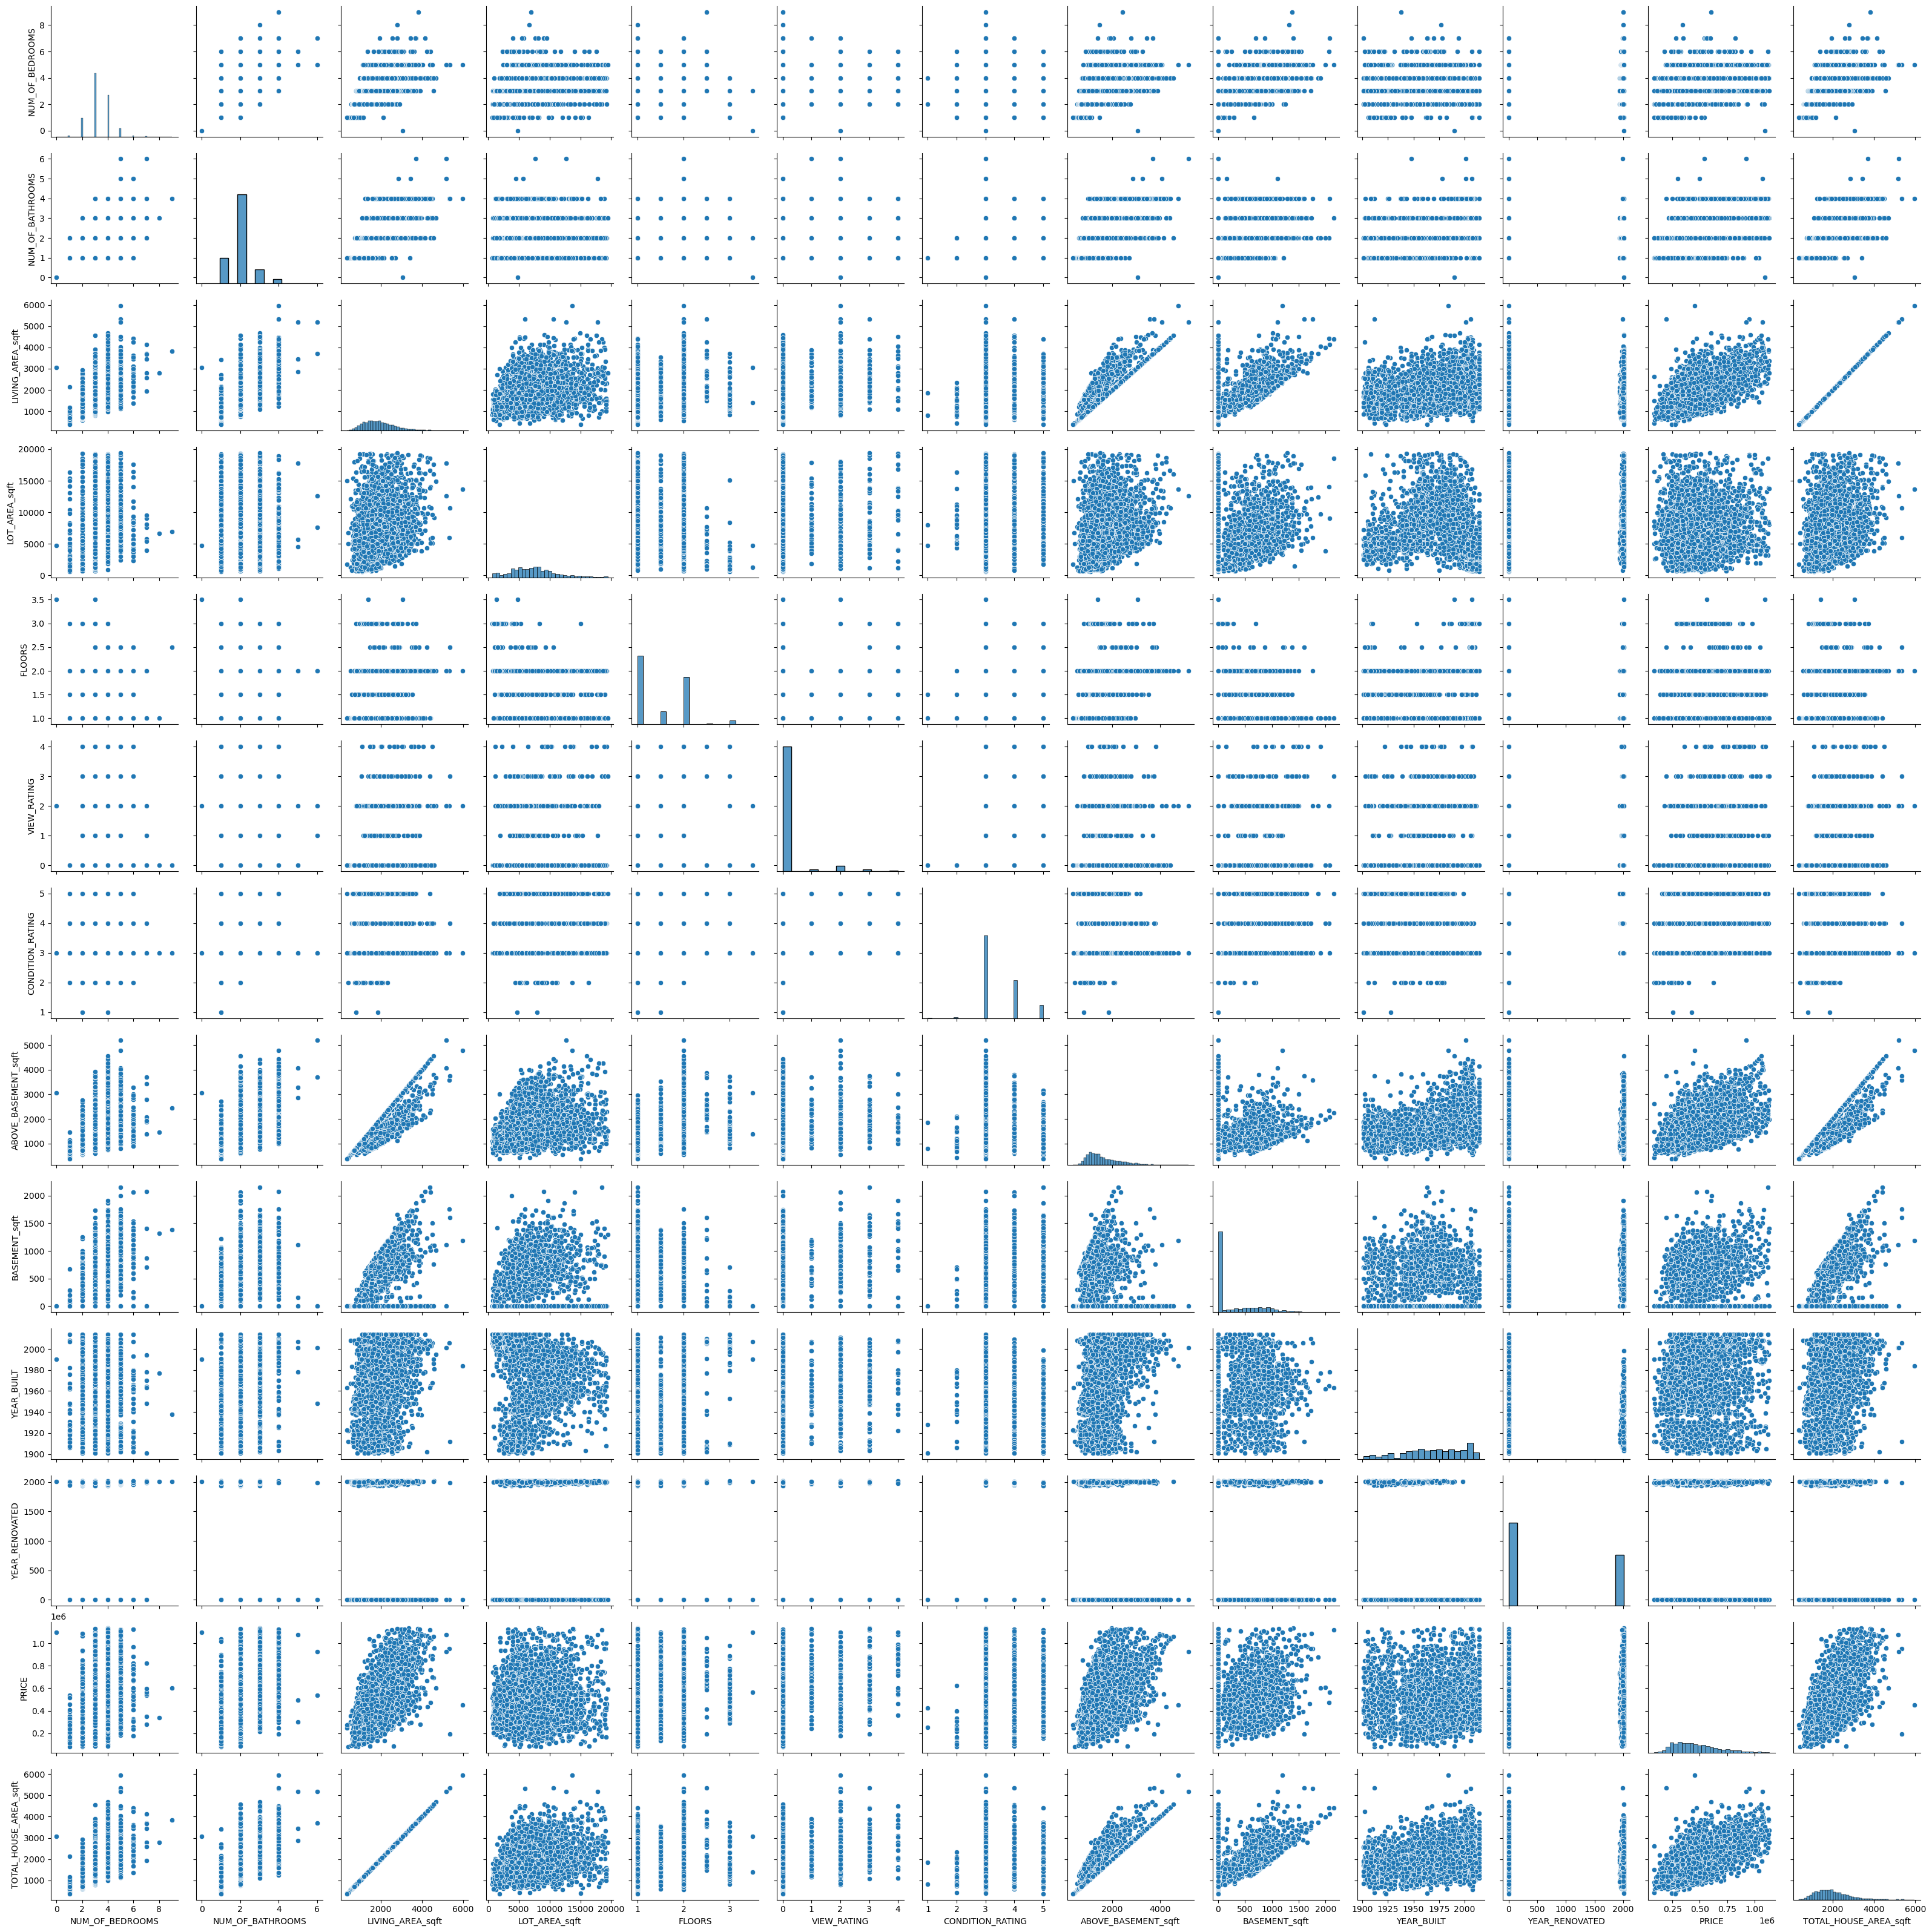

In [72]:
sns.pairplot(data=hp[['NUM_OF_BEDROOMS','NUM_OF_BATHROOMS','LIVING_AREA_sqft','LOT_AREA_sqft','FLOORS','VIEW_RATING','CONDITION_RATING','ABOVE_BASEMENT_sqft','BASEMENT_sqft','YEAR_BUILT','YEAR_RENOVATED','PRICE','TOTAL_HOUSE_AREA_sqft']])
plt.show()

# 13. Understanding the cumulative distribution function for price

<Axes: xlabel='PRICE', ylabel='Proportion'>

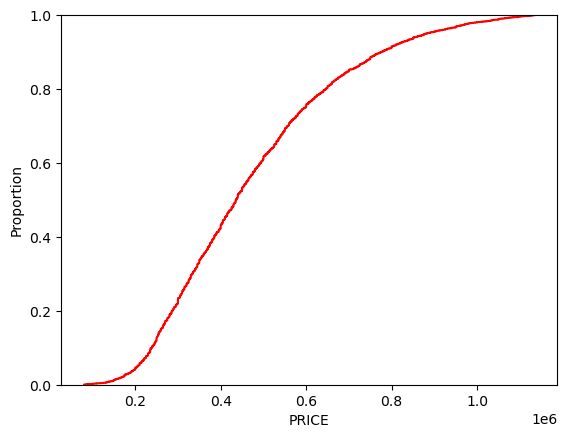

In [73]:
sns.ecdfplot(df['PRICE'],stat='proportion',color='red')

# 14. Analyzing probability density function for a numerical variable i.e price using kde plots

<Axes: xlabel='PRICE', ylabel='Density'>

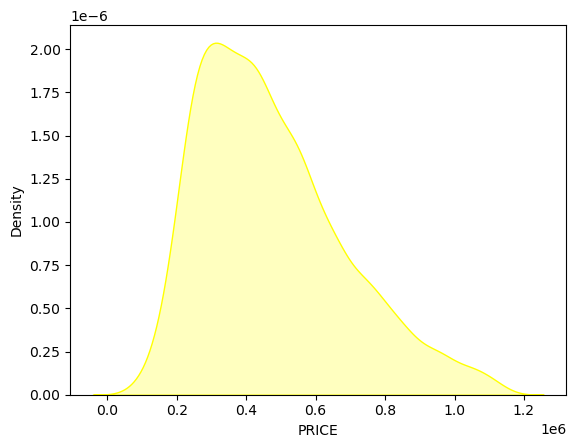

In [74]:
sns.kdeplot(hp['PRICE'],fill=True,color='yellow')

# 15. Visualize how the price is distributed

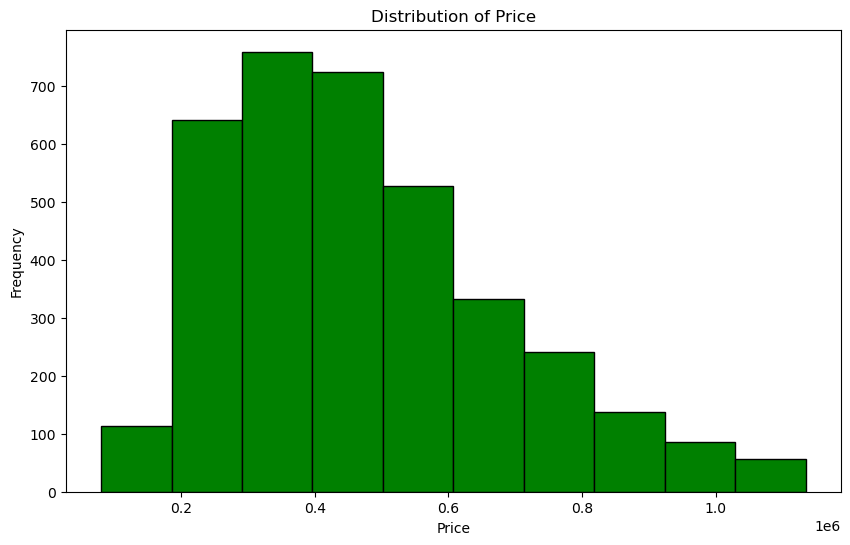

In [75]:
plt.figure(figsize=(10, 6))
plt.hist(hp['PRICE'], bins=10, color='green', edgecolor='black')
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# 16. Pie Chart to explore two categories Bathrooms and Bedrooms

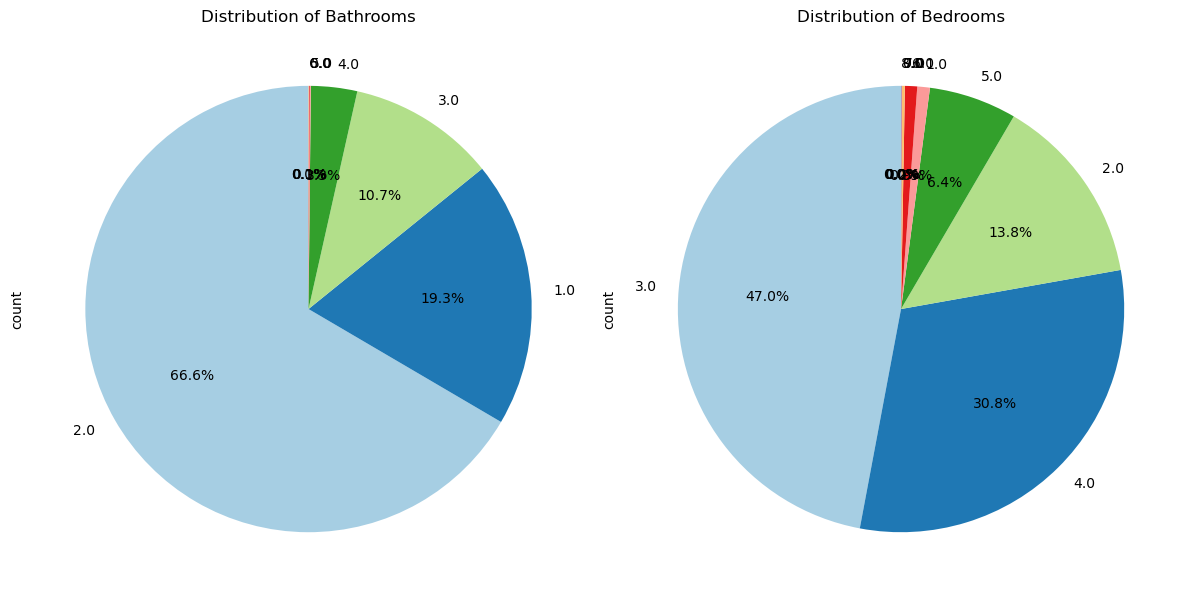

In [76]:
#Percentage distribution of source and destination
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
hp['NUM_OF_BATHROOMS'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of Bathrooms')
# Create a pie chart for Category2
plt.subplot(1, 2, 2)
hp['NUM_OF_BEDROOMS'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of Bedrooms')
plt.tight_layout()
plt.show()


# 17. Plot Between Year Built and Price Variation over time

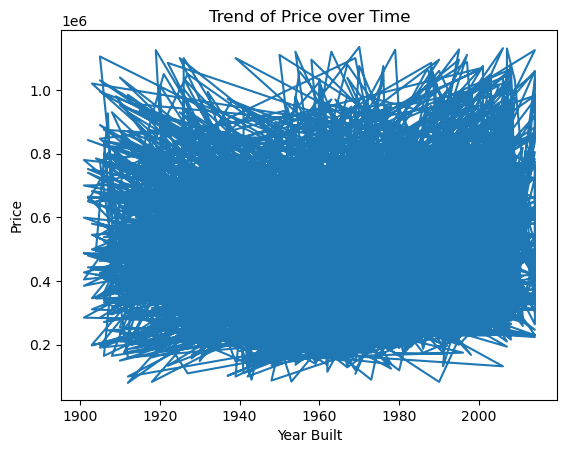

In [77]:
plt.plot(hp['YEAR_BUILT'], hp['PRICE'])
plt.xlabel('Year Built')
plt.ylabel('Price')
plt.title('Trend of Price over Time')
plt.show()

# 18. Joint Plot Between TOTAL_HOUSE_AREA_sqft and PRICE

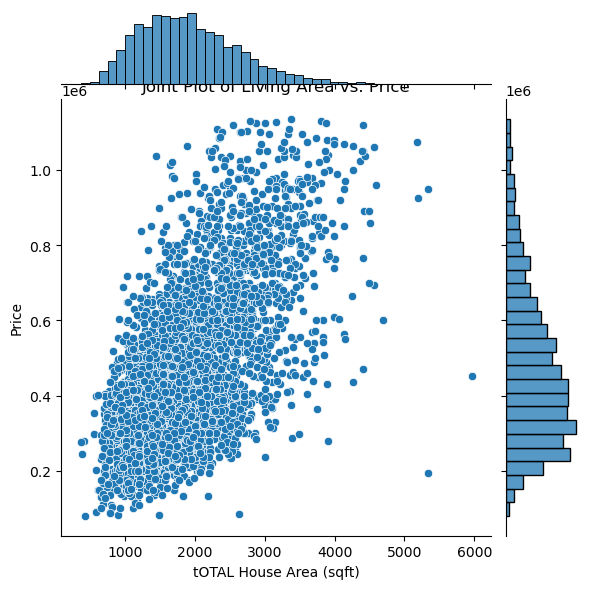

In [78]:
sns.jointplot(x='TOTAL_HOUSE_AREA_sqft', y='PRICE', data=hp, kind='scatter')
plt.xlabel('tOTAL House Area (sqft)')
plt.ylabel('Price')
plt.title('Joint Plot of Living Area vs. Price')
plt.show()


# Algorithms

# Here For every model, we have applied some hyper tuning which might take longer time to execute

In [79]:
X = hp.drop([ 'PRICE'], axis=1)
y = hp['PRICE']

X = pd.get_dummies(X, drop_first=True)

# 1. Linear Regression

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1688, shuffle=True, stratify=None)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_1 = LinearRegression()
model_1.fit(X_train_scaled, y_train)

y_pred = model_1.predict(X_test_scaled)

r2_lr = r2_score(y_test, y_pred)
mse_lr = mean_squared_error(y_test, y_pred)

print("R Squared Error:", r2_lr)
print("Mean Squared Error:", mse_lr)


R Squared Error: 0.6280344569935457
Mean Squared Error: 16817657403.796228


In [81]:
model_1.score(X_train_scaled , y_train)

0.5451907154619675

In [82]:
model_1.score(X_test_scaled, y_test)

0.6280344569935457

In [83]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np

param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'positive': [True, False],
    'n_jobs': [None] 
}
grid_search = GridSearchCV(LinearRegression(), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

r2_cv = r2_score(y_test, y_pred)
mse_cv = mean_squared_error(y_test, y_pred)

print("Best Parameters:", grid_search.best_params_)
print("R Squared Error (Cross-Validation):", r2_cv)
print("Mean Squared Error (Cross-Validation):", mse_cv)


Best Parameters: {'copy_X': True, 'fit_intercept': False, 'n_jobs': None, 'positive': True}
R Squared Error (Cross-Validation): 0.580633086870598
Mean Squared Error (Cross-Validation): 18960812914.26362


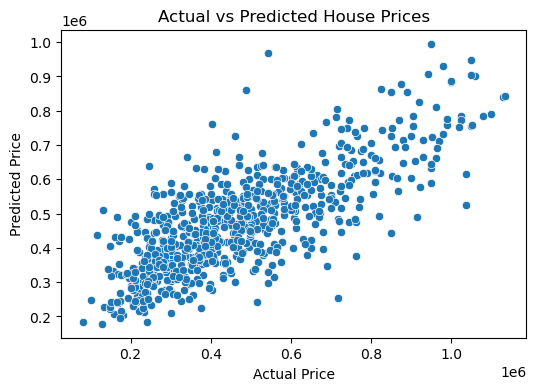

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices')
plt.show()


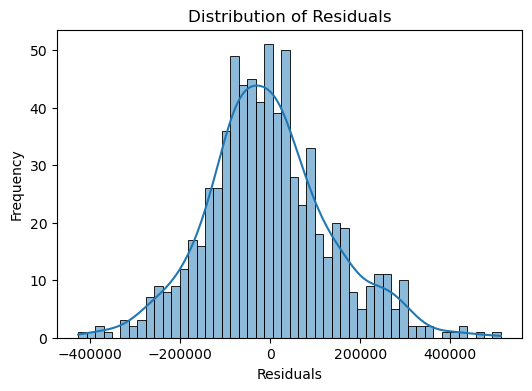

In [85]:
residuals = y_test - y_pred

plt.figure(figsize=(6, 4))
sns.histplot(residuals, bins=50, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()


# 2. K Nearest Neighbors

In [86]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=766)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_2 = KNeighborsRegressor(n_neighbors=10, weights= 'uniform',algorithm= 'ball_tree')  

model_2.fit(X_train_scaled, y_train)

y_pred = model_2.predict(X_test_scaled)
mse_knn = mean_squared_error(y_test, y_pred)

r2_knn = r2_score(y_test, y_pred)
print(f"R Squared Error: {r2_knn}")
print("Mean Squared Error:", mse_knn)

R Squared Error: 0.4600944850962627
Mean Squared Error: 23488775862.288277


In [87]:
model_2.score(X_train_scaled , y_train)

0.47158230718480565

In [88]:
model_2.score(X_test_scaled, y_test)

0.4600944850962627

In [89]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np

param_grid = {
    'n_neighbors': np.arange(1, 11),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

r2_cv = r2_score(y_test, y_pred)
mse_cv = mean_squared_error(y_test, y_pred)

print("Best Parameters:", grid_search.best_params_)
print("R Squared Error (Cross-Validation):", r2_cv)
print("Mean Squared Error (Cross-Validation):", mse_cv)


Best Parameters: {'algorithm': 'ball_tree', 'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}
R Squared Error (Cross-Validation): 0.4014179864050458
Mean Squared Error (Cross-Validation): 26041517199.60835


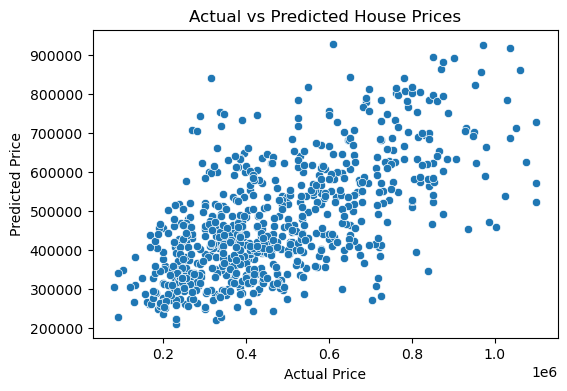

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices')
plt.show()


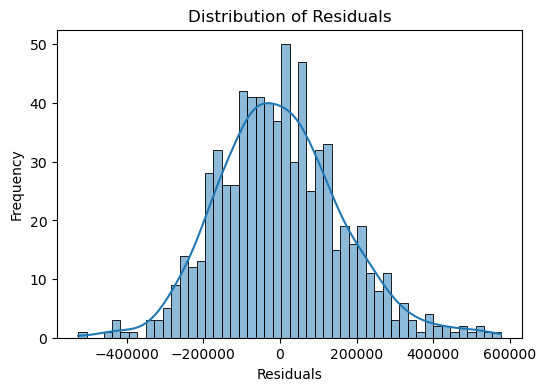

In [91]:
residuals = y_test - y_pred

plt.figure(figsize=(6,4))
sns.histplot(residuals, bins=50, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()


# 3. Support Vector Regressor

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_3 = SVR(kernel='linear')

model_3.fit(X_train_scaled, y_train)

y_pred = model_3.predict(X_test_scaled)
mse_svm = mean_squared_error(y_test, y_pred)

r2_svm = r2_score(y_test, y_pred)
print(f"R Squared Error: {r2_svm}")
print("Mean Squared Error:", mse_svm)

R Squared Error: 0.031146513199410086
Mean Squared Error: 37846328236.62354


In [93]:
model_3.score(X_train_scaled , y_train)

0.006327712033300292

In [94]:
model_3.score(X_test_scaled, y_test)

0.031146513199410086

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np

param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'epsilon': [0.1, 0.2, 0.5, 1]
}


grid_search = GridSearchCV(SVR(), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

r2_cv = r2_score(y_test, y_pred)
mse_cv = mean_squared_error(y_test, y_pred)

print("Best Parameters:", grid_search.best_params_)
print("R Squared Error (Cross-Validation):", r2_cv)
print("Mean Squared Error (Cross-Validation):", mse_cv)

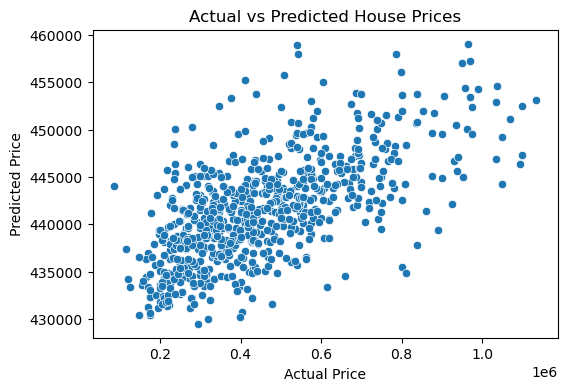

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices')
plt.show()


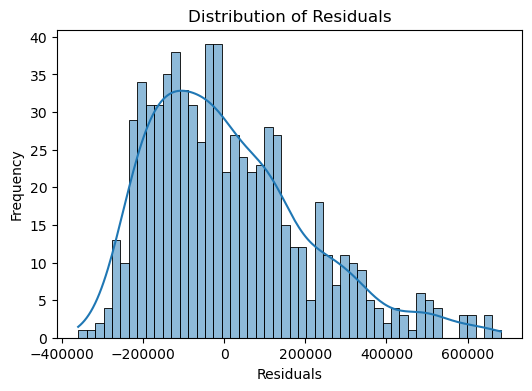

In [96]:
residuals = y_test - y_pred

plt.figure(figsize=(6, 4))
sns.histplot(residuals, bins=50, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()


# 4. XG BOOST

In [97]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from xgboost import XGBRegressor


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_4 = XGBRegressor(objective='reg:squarederror', random_state=42)

model_4.fit(X_train, y_train)

y_pred = model_4.predict(X_test)

r2_xgb = r2_score(y_test, y_pred)
print(f"R Squared Error: {r2_xgb}")

mse_xgb = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse_xgb}")


R Squared Error: 0.5235419755270061
Mean Squared Error: 20020951047.312397


In [98]:
model_4.score(X_train , y_train)

0.9335400881804145

In [99]:
model_4.score(X_test, y_test)

0.5235419755270061

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np


param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0],
    'gamma': [0, 0.1, 0.3],
    'reg_lambda': [0.1, 1, 10]
}

grid_search = GridSearchCV(XGBRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

r2_cv = r2_score(y_test, y_pred)
mse_cv = mean_squared_error(y_test, y_pred)

print("Best Parameters:", grid_search.best_params_)
print("R Squared Error (Cross-Validation):", r2_cv)
print("Mean Squared Error (Cross-Validation):", mse_cv)

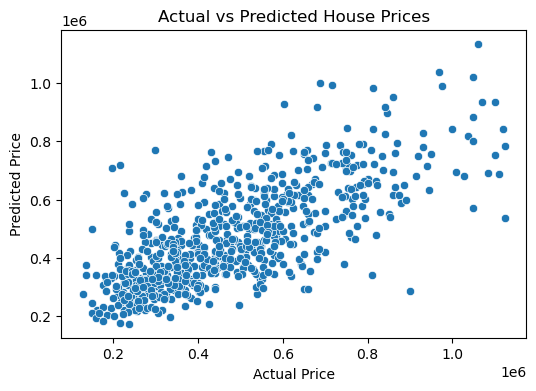

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices')
plt.show()


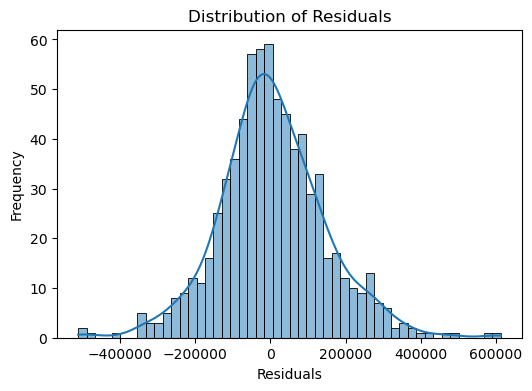

In [101]:
residuals = y_test - y_pred

plt.figure(figsize=(6, 4))
sns.histplot(residuals, bins=50, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()


# 5. Decision Tree Regressor

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=535)
#535
params = {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 15}

model_5 = DecisionTreeRegressor(**params, random_state=42)

model_5.fit(X_train, y_train)

y_pred = model_5.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred)

r2_dt = r2_score(y_test, y_pred)
print("R-squared Error:", r2_dt)
print("Mean Squared Error:", mse_dt)

R-squared Error: 0.5307791835610987
Mean Squared Error: 22622965592.472996


In [103]:
model_5.score(X_train , y_train)

0.4835447238502252

In [104]:
model_5.score(X_test, y_test)

0.5307791835610987

In [105]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

r2_cv = r2_score(y_test, y_pred)
mse_cv = mean_squared_error(y_test, y_pred)

print("Best Parameters:", grid_search.best_params_)
print("R Squared Error (Cross-Validation):", r2_cv)
print("Mean Squared Error (Cross-Validation):", mse_cv)


Best Parameters: {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
R Squared Error (Cross-Validation): 0.5184276696998871
Mean Squared Error (Cross-Validation): 23218480248.48896


C:\Users\Satvik Jonnalagadda\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
180 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
66 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Satvik Jonnalagadda\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Satvik Jonnalagadda\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\Satvik Jonnalagadda\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constr

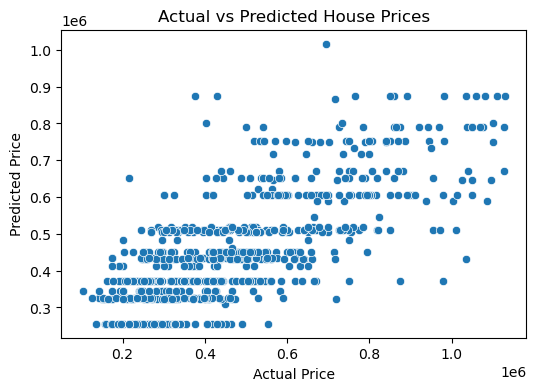

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices')
plt.show()


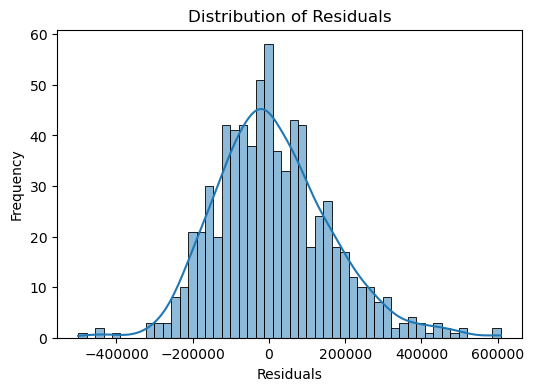

In [107]:
residuals = y_test - y_pred

plt.figure(figsize=(6, 4))
sns.histplot(residuals, bins=50, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()


# 6. Random Forest Regressor

In [108]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_6 = RandomForestRegressor(n_estimators=150, max_depth=20, min_samples_split=10, min_samples_leaf=1, random_state=42)

model_6.fit(X_train, y_train)

y_pred = model_6.predict(X_test)

r2_rf = r2_score(y_test, y_pred)
mse_rf = mean_squared_error(y_test, y_pred)

print("R-squared Error:", r2_rf)
print("Mean Squared Error:", mse_rf)

R-squared Error: 0.5290088716360211
Mean Squared Error: 19791229951.733418


In [109]:
model_6.score(X_train , y_train)

0.8578776092317861

In [110]:
model_6.score(X_test, y_test)

0.5290088716360211

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

r2_cv = r2_score(y_test, y_pred)
mse_cv = mean_squared_error(y_test, y_pred)

print("Best Parameters:", grid_search.best_params_)
print("R Squared Error (Cross-Validation):", r2_cv)
print("Mean Squared Error (Cross-Validation):", mse_cv)

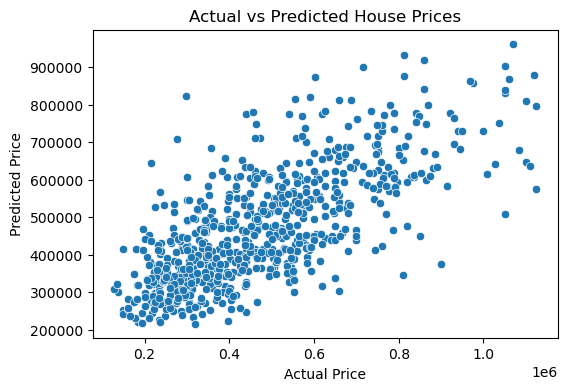

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices')
plt.show()


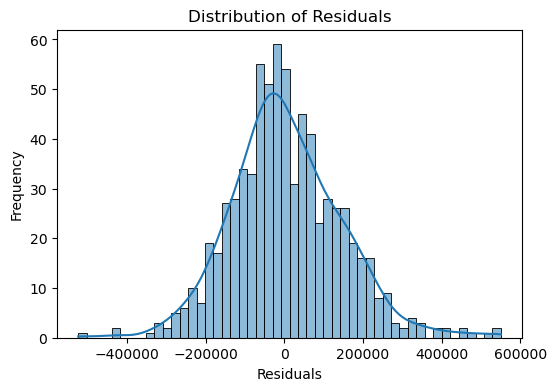

In [112]:
residuals = y_test - y_pred

plt.figure(figsize=(6, 4))
sns.histplot(residuals, bins=50, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()


# 7.Gradient Boosting Regression

In [113]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_7 = GradientBoostingRegressor(learning_rate=0.01, max_depth=3, n_estimators=150)
model_7.fit(X_train, y_train)

y_pred = model_7.predict(X_test)

mse_gbr = mean_squared_error(y_test, y_pred)
r2_gbr = r2_score(y_test, y_pred)

print("R Squared Error:", r2_gbr)
print("Mean Squared Error:", mse_gbr)


R Squared Error: 0.4068694774098145
Mean Squared Error: 24923574685.47161


In [114]:
model_7.score(X_train,y_train)

0.46635380272444227

In [115]:
model_7.score(X_test,y_test)

0.4068694774098145

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np


param_grid = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}
grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

r2_cv = r2_score(y_test, y_pred)
mse_cv = mean_squared_error(y_test, y_pred)

print("Best Parameters:", grid_search.best_params_)
print("R Squared Error (Cross-Validation):", r2_cv)
print("Mean Squared Error (Cross-Validation):", mse_cv)


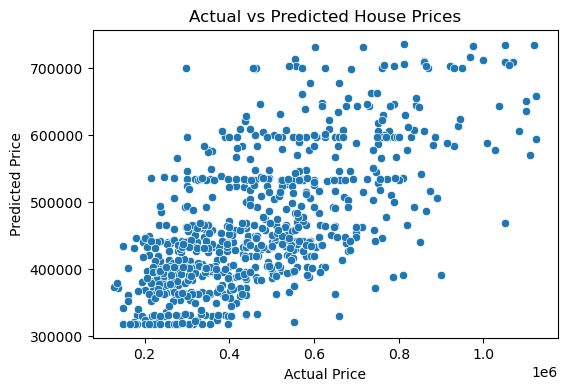

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices')
plt.show()


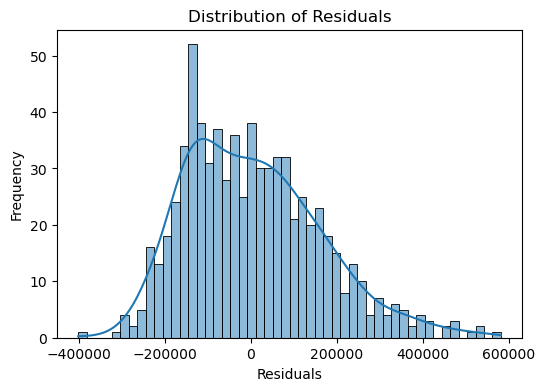

In [117]:
residuals = y_test - y_pred

plt.figure(figsize=(6, 4))
sns.histplot(residuals, bins=50, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()


# K Means

In [126]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns


city_data = hp['CITY'].str.get_dummies()
kmeans = KMeans(n_clusters=10, random_state=0).fit(city_data)
hp['city_cluster'] = kmeans.labels_

model_8 = LinearRegression()
model_8.fit(X, y)

y_pred = model_8.predict(X)

r2_kmeans = r2_score(y, y_pred)
mse_kmeans = mean_squared_error(y, y_pred)

print("R-squared:", r2_kmeans)
print("Mean Squared Error:", mse_kmeans)


C:\Users\Satvik Jonnalagadda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


R-squared: 0.5674466994963783
Mean Squared Error: 18931871268.071293


In [119]:
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score
import numpy as np


param_grid = {
    'n_clusters': np.arange(2, 11)  
}

kmeans = KMeans(random_state=42)

grid_search = GridSearchCV(kmeans, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train)
best_model = grid_search.best_estimator_

clusters = best_model.predict(X_train)

silhouette_avg = silhouette_score(X_train, clusters)

print("Best Number of Clusters:", best_model.n_clusters)
print("Silhouette Score:", silhouette_avg)


C:\Users\Satvik Jonnalagadda\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan]
  warnings.warn(
C:\Users\Satvik Jonnalagadda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Best Number of Clusters: 2
Silhouette Score: 0.42181807647741626


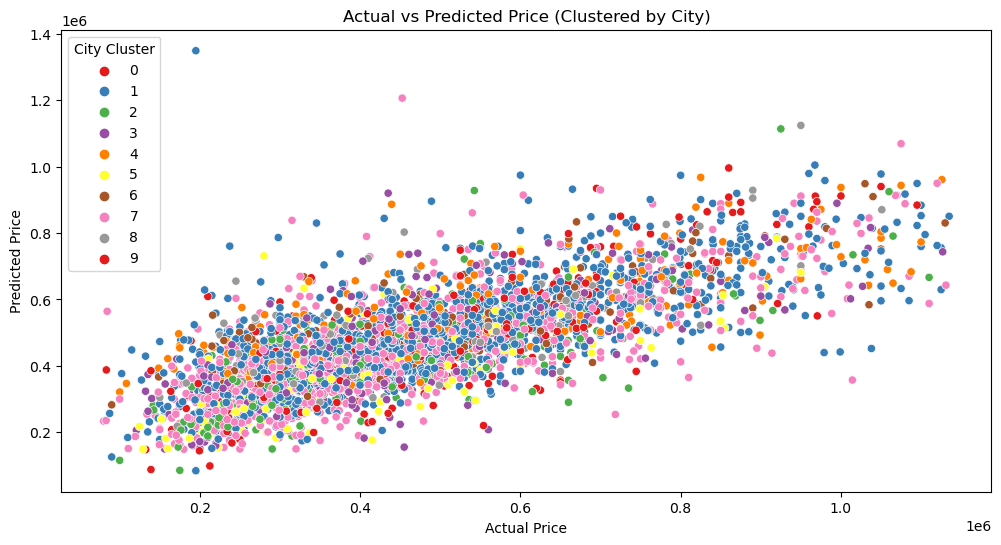

In [120]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y, y=y_pred, hue=hp['city_cluster'], palette='Set1')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price (Clustered by City)')
plt.legend(title='City Cluster')
plt.show()

# Visualization Across the Models

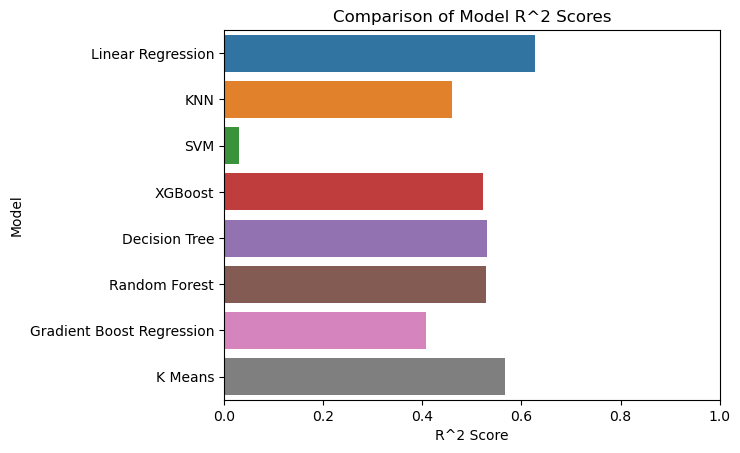

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns


model_names = ['Linear Regression', 'KNN', 'SVM', 'XGBoost','Decision Tree', 'Random Forest','Gradient Boost Regression','K Means']
r2_scores = [r2_lr, r2_knn, r2_svm, r2_xgb, r2_dt, r2_rf, r2_gbr, r2_kmeans]


sns.barplot(x=r2_scores, y=model_names)
plt.xlabel('R^2 Score')
plt.ylabel('Model')
plt.title('Comparison of Model R^2 Scores')
plt.xlim(0, 1)  
plt.show()


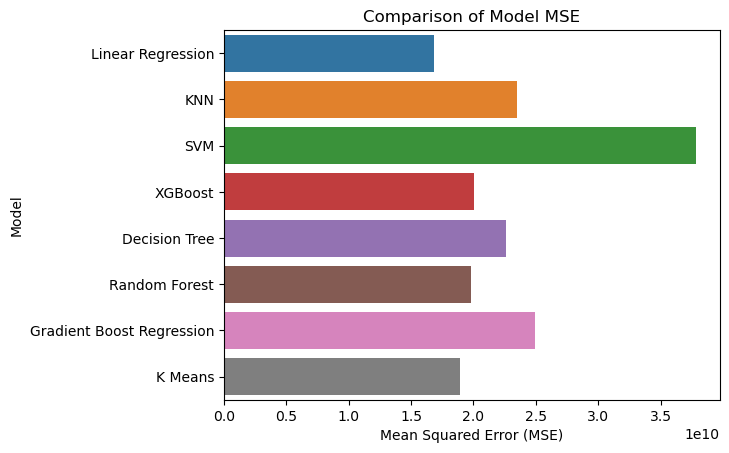

In [122]:
mse_scores = [mse_lr,mse_knn,mse_svm,mse_xgb,mse_dt,mse_rf,mse_gbr,mse_kmeans] 
sns.barplot(x=mse_scores, y=model_names)
plt.xlabel('Mean Squared Error (MSE)')
plt.ylabel('Model')
plt.title('Comparison of Model MSE')
plt.show()


C:\Users\Satvik Jonnalagadda\AppData\Local\Temp\ipykernel_6788\1150785258.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(model_names, rotation=45, ha='right')


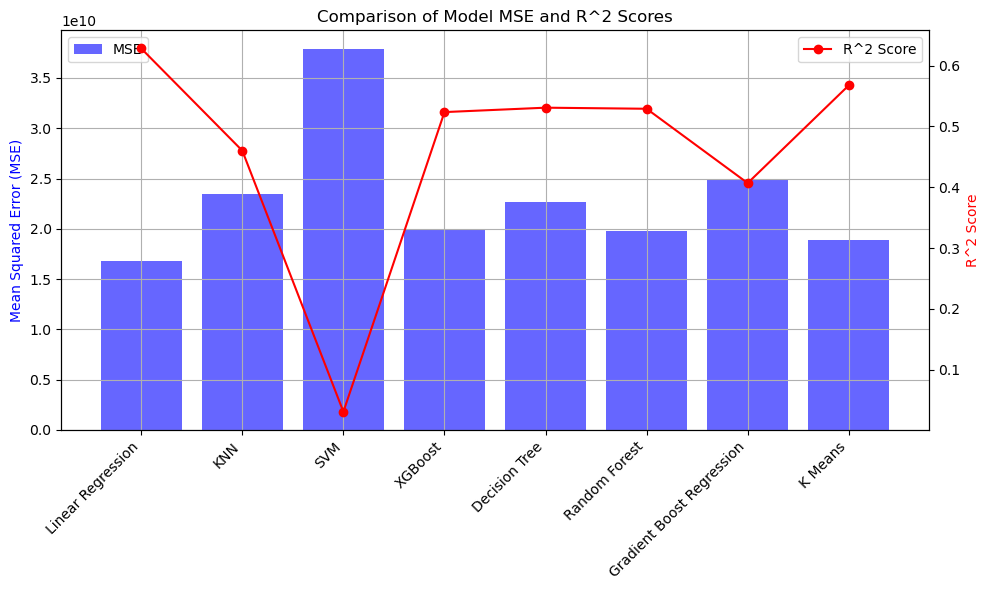

In [123]:
import matplotlib.pyplot as plt

mse_scores = [mse_lr, mse_knn, mse_svm, mse_xgb, mse_dt, mse_rf, mse_gbr,mse_kmeans]
r2_scores = [r2_lr, r2_knn, r2_svm, r2_xgb, r2_dt, r2_rf, r2_gbr,r2_kmeans]
model_names = ['Linear Regression', 'KNN', 'SVM', 'XGBoost', 'Decision Tree', 'Random Forest', 'Gradient Boost Regression','K Means']

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(model_names, mse_scores, color='b', alpha=0.6, label='MSE')
ax2 = ax1.twinx()
ax2.plot(model_names, r2_scores, color='r', marker='o', label='R^2 Score')
ax1.set_ylabel('Mean Squared Error (MSE)', color='b')
ax2.set_ylabel('R^2 Score', color='r')

plt.title('Comparison of Model MSE and R^2 Scores')
ax1.grid(True)
ax1.set_xticklabels(model_names, rotation=45, ha='right')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


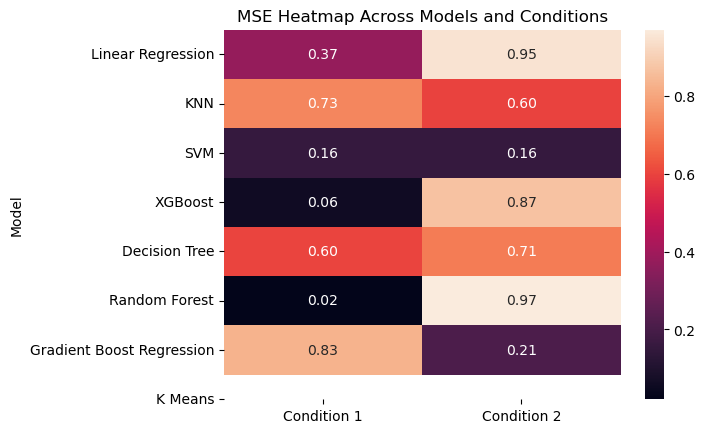

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42) 
mse_matrix = np.random.rand(7, 2)  

model_names = ['Linear Regression', 'KNN', 'SVM', 'XGBoost', 'Decision Tree', 'Random Forest', 'Gradient Boost Regression','K Means']

sns.heatmap(mse_matrix, annot=True, fmt=".2f", xticklabels=['Condition 1', 'Condition 2'], yticklabels=model_names)

plt.ylabel('Model')
plt.title('MSE Heatmap Across Models and Conditions')

plt.show()
